In [1]:
import pickle
import numpy as np 
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
import glob

mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams["image.origin"] = 'lower'

In [7]:
output_dir = "../models/input_vars"
limit_files = 20
numpy_version= 1
cols = ["seed_eta", "seed_phi", "seed_iz","en_seed","et_seed",
        "cluster_deta", "cluster_dphi", "en_cluster", "et_cluster",
       "seed_f5_r9", "seed_f5_sigmaIetaIeta","seed_f5_sigmaIetaIphi","seed_f5_sigmaIphiIphi",
        "seed_f5_swissCross","seed_nxtals", "seed_etaWidth", "seed_phiWidth",
        "cl_f5_r9", "cl_f5_sigmaIetaIeta","cl_f5_sigmaIetaIphi","cl_f5_sigmaIphiIphi",
        "cl_f5_swissCross", "cl_nxtals", "cl_etaWidth", "cl_phiWidth"]

os.makedirs(output_dir, exist_ok = True)

# Data preparation
## Input: 
- E seed
- eta,phi,z seed
- E cluster
- delta_eta,delta_phi,

Filter only windows with the calo

In [3]:
files_ele = f"/storage/ECAL/training_data/wp_comparison/electrons/"
files_gamma = f"/storage/ECAL/training_data/wp_comparison/gammas/"

In [8]:
def get_data(folder, particle, nfiles):
    datas = []

    i = 0
    for f in glob.glob(folder+"*.pkl"):
        if i>nfiles :continue
        d = pickle.load(open(f, "rb"))   
        datas.append(d[d.is_seed == False])
        i+=1

    data = pd.concat(datas, ignore_index=True)
    data["particle"] = particle
    return data

In [9]:
ele_wpele   = get_data(files_ele+"/numpy_wp_ele_v1/training/", "electron", 5)
ele_wpgamma = get_data(files_ele+"/numpy_wp_gamma_v1/training/", "electron", 5)
#ele_wpcomb  = get_data(files_ele+"/numpy_wp_elegammacomb_v1/training/", "electron", 5)
gamma_wpele   = get_data(files_gamma+"/numpy_wp_ele_v1/training/", "electron", 5)
gamma_wpgamma = get_data(files_gamma+"/numpy_wp_gamma_v1/training/", "electron", 5)
#gamma_wpcomb  = get_data(files_gamma+"/numpy_wp_elegammacomb_v1/training/", "electron", 5)

Balance gamma and electron

In [5]:
data_EB = data[data.seed_iz == 0]
data_EE = data[data.seed_iz != 0]

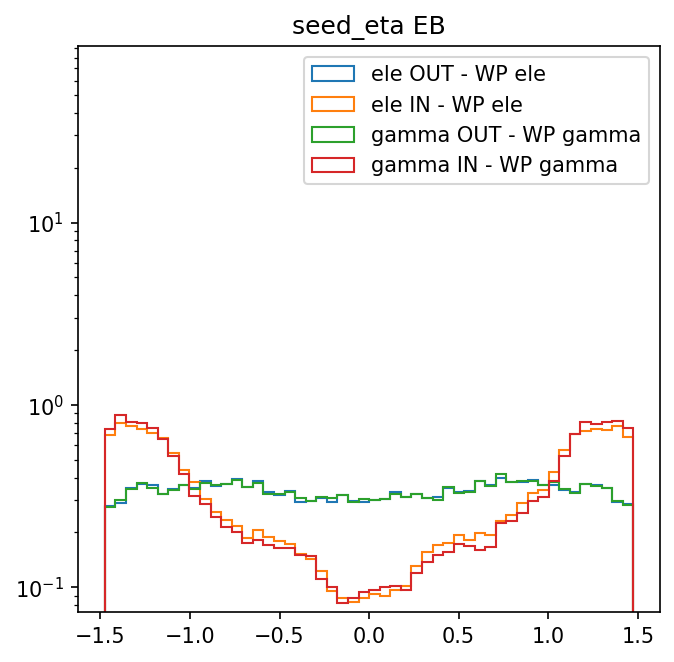

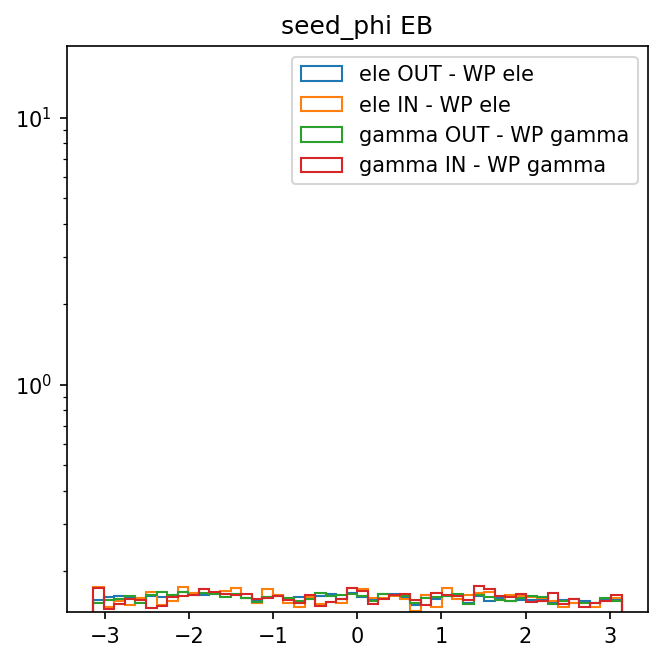

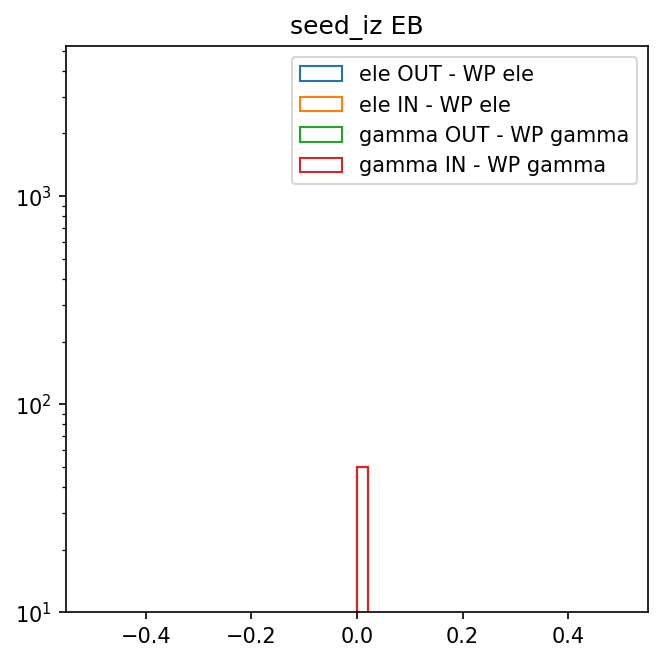

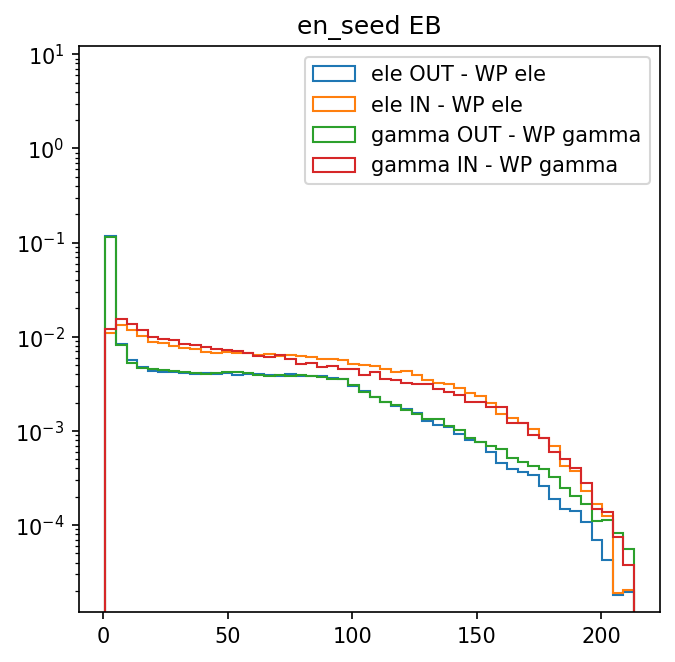

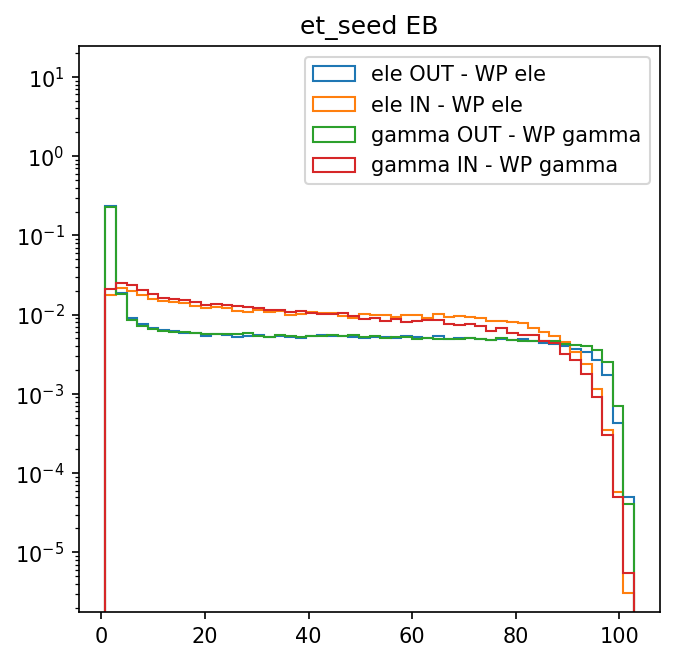

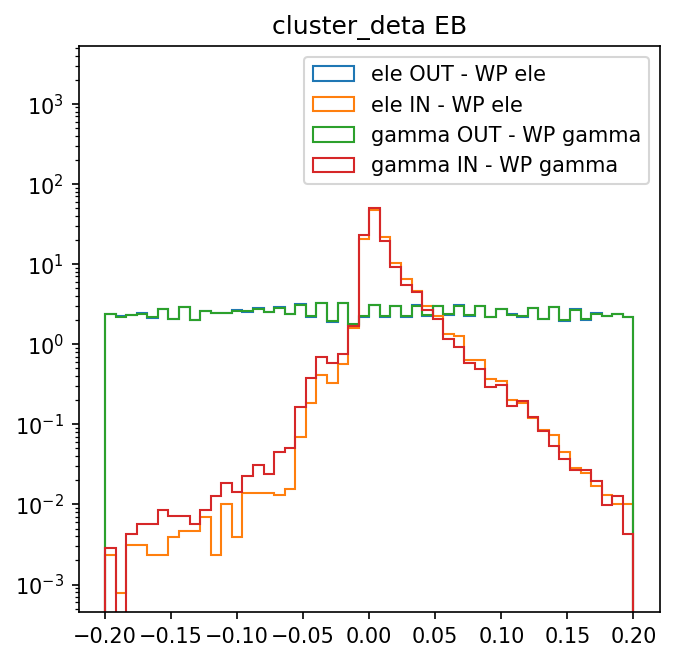

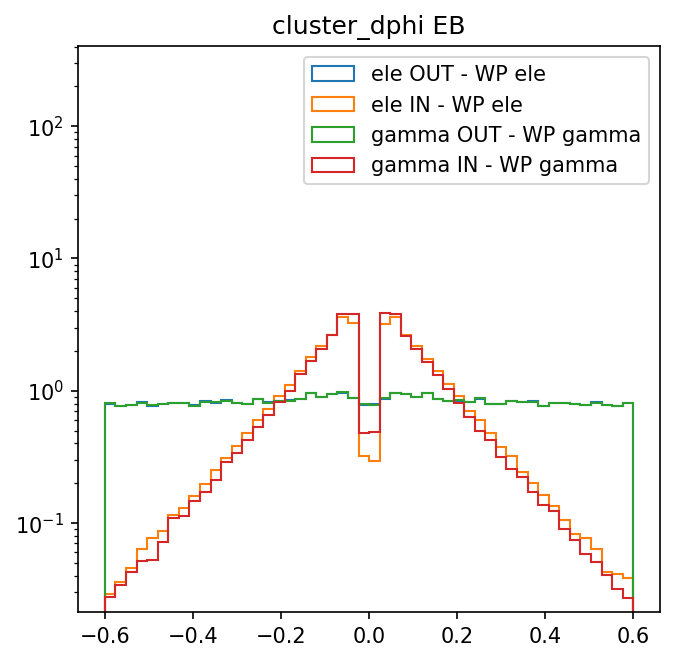

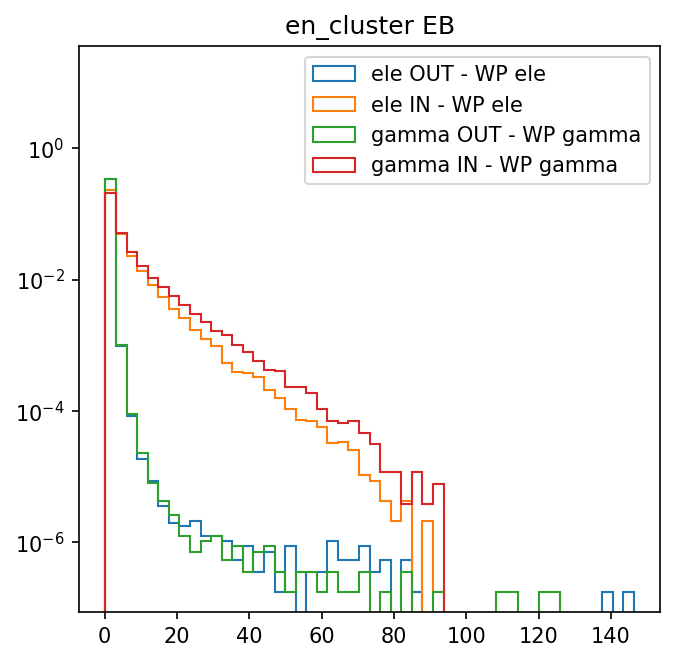

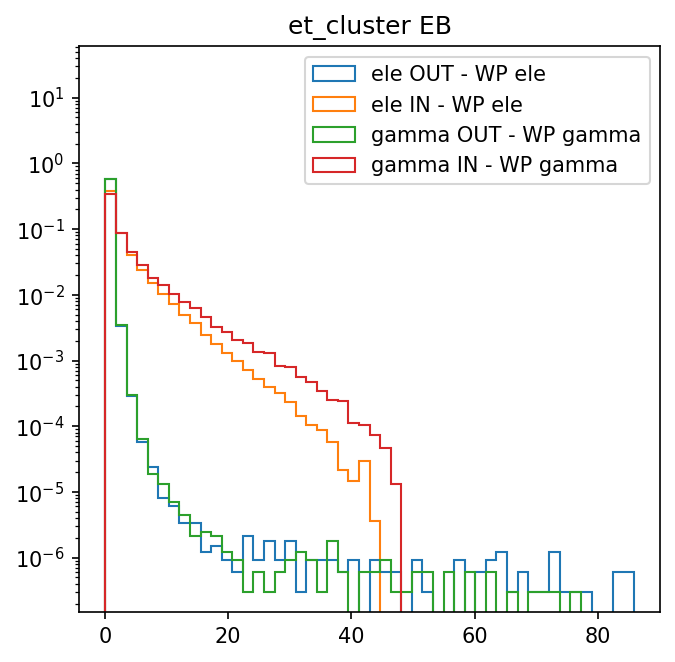

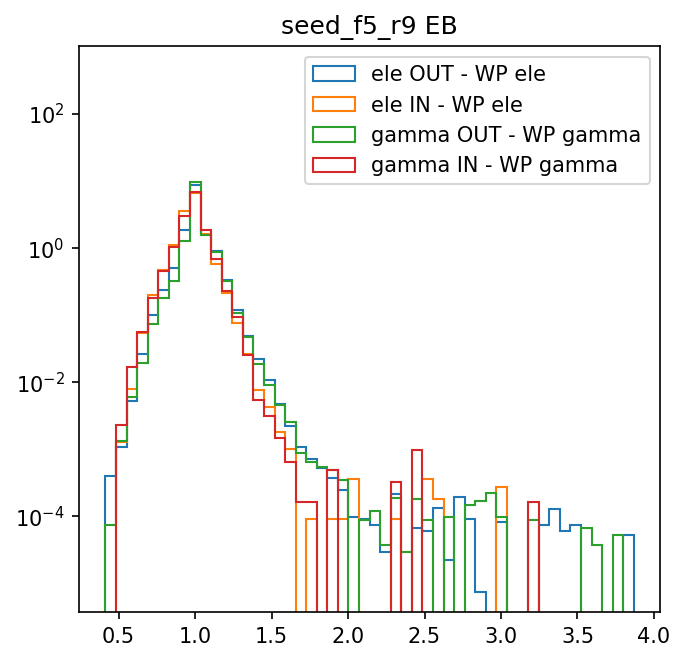

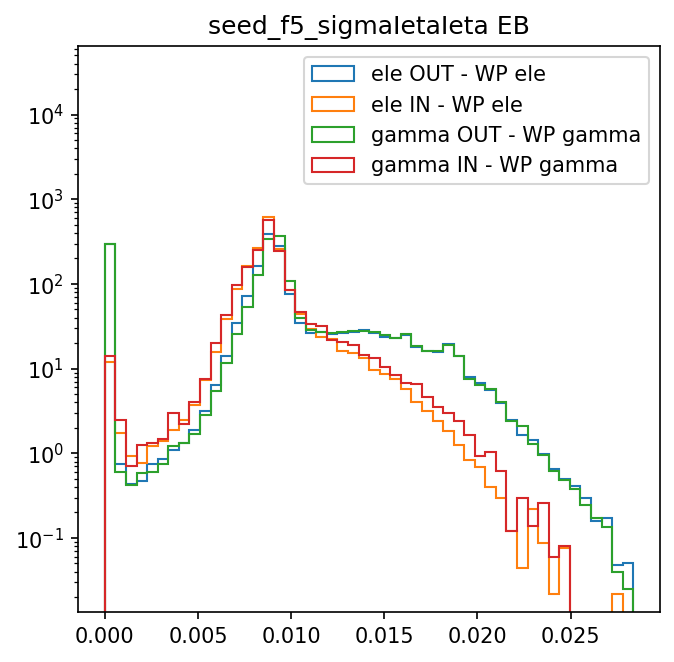

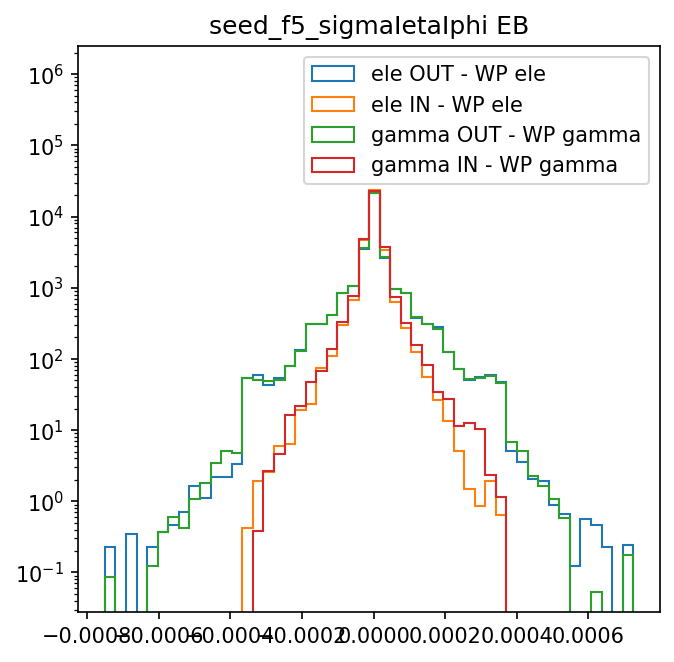

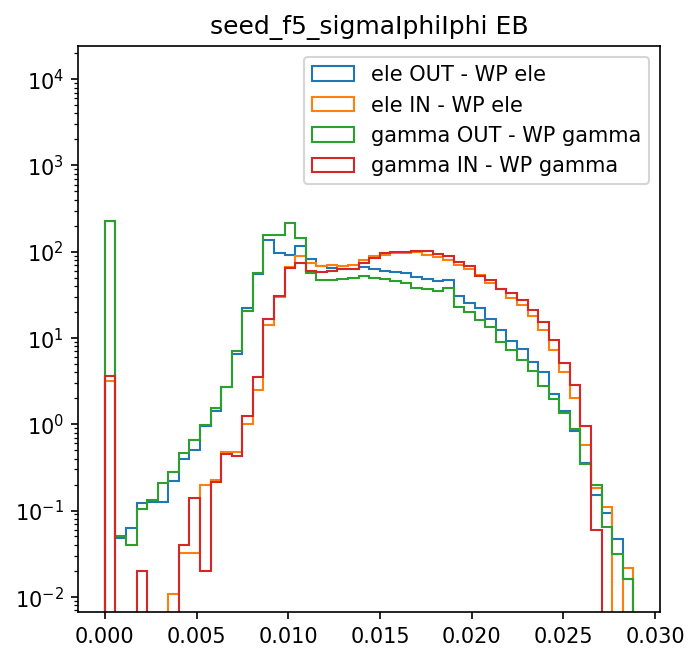

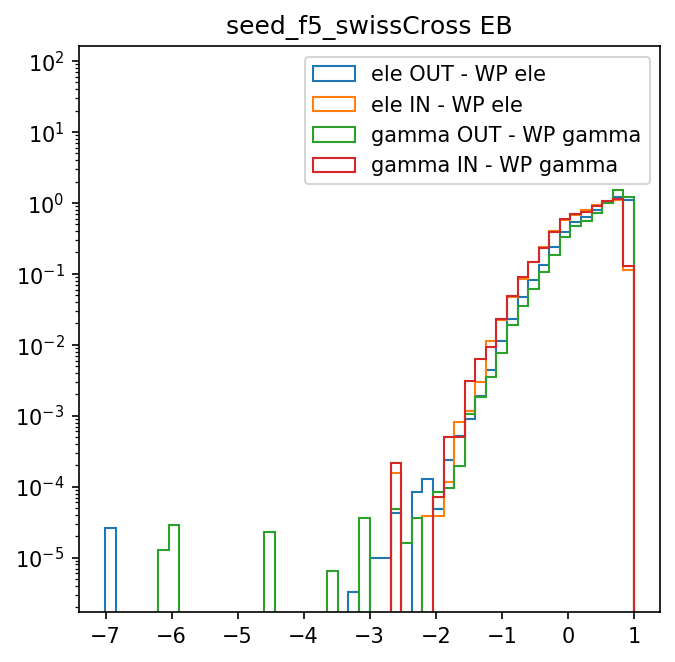

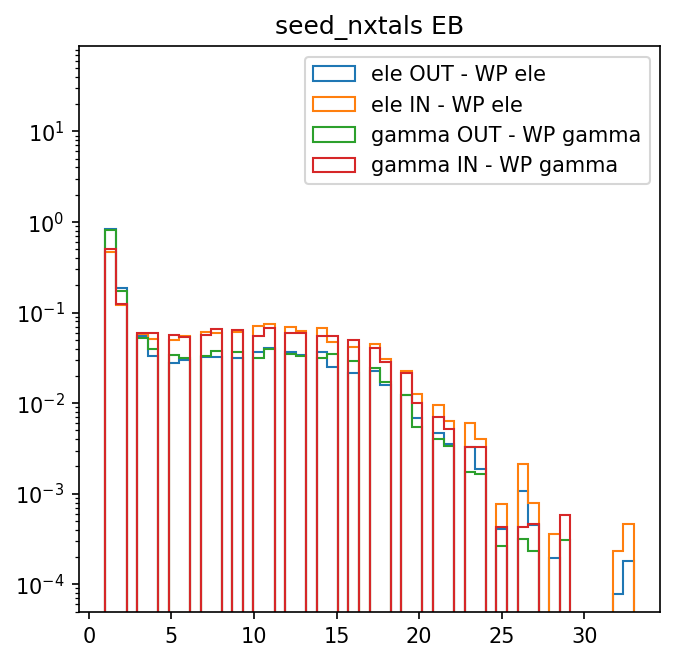

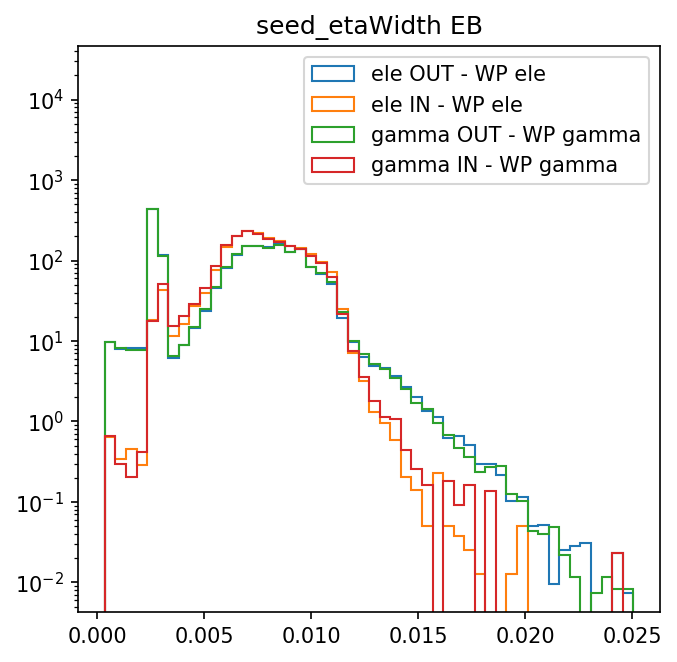

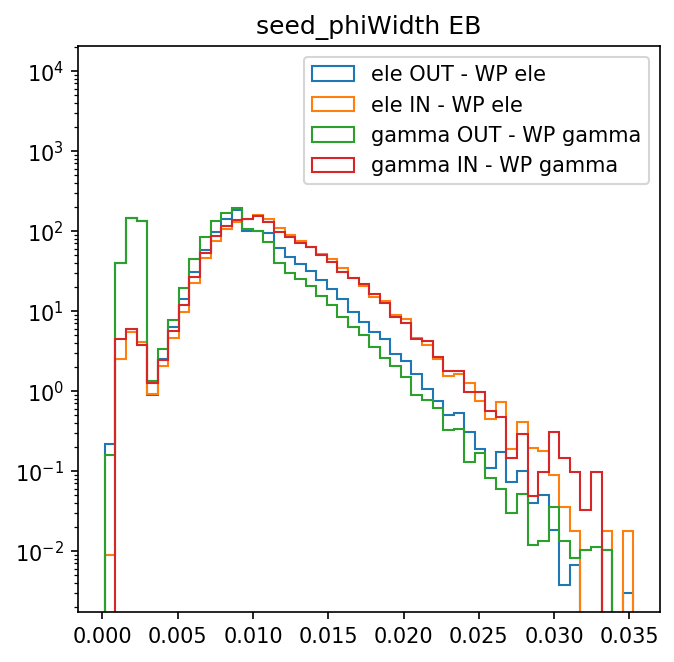

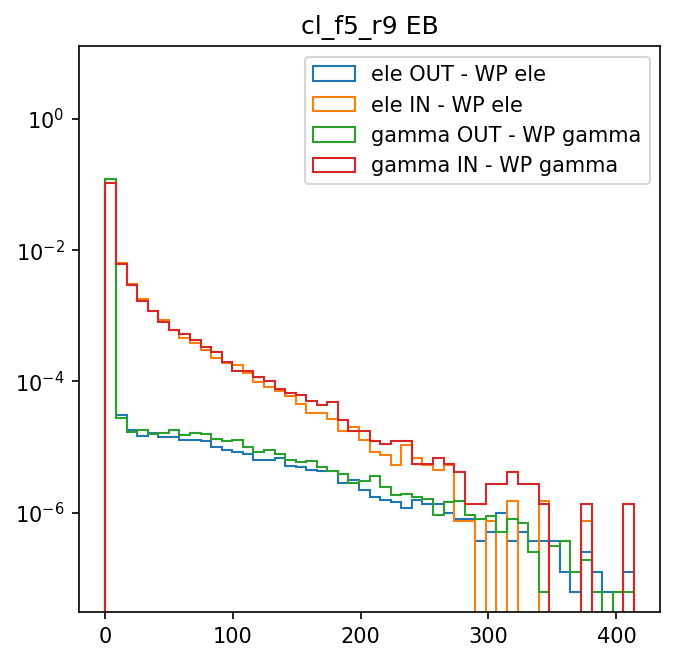

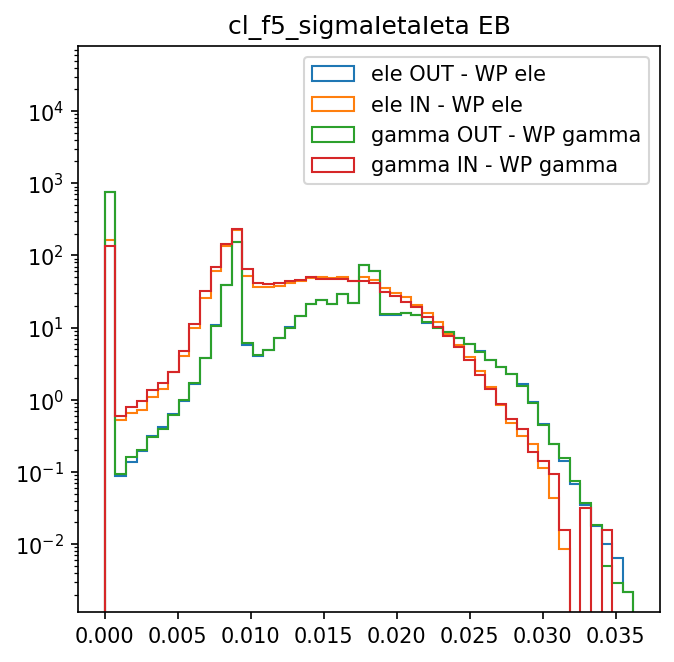

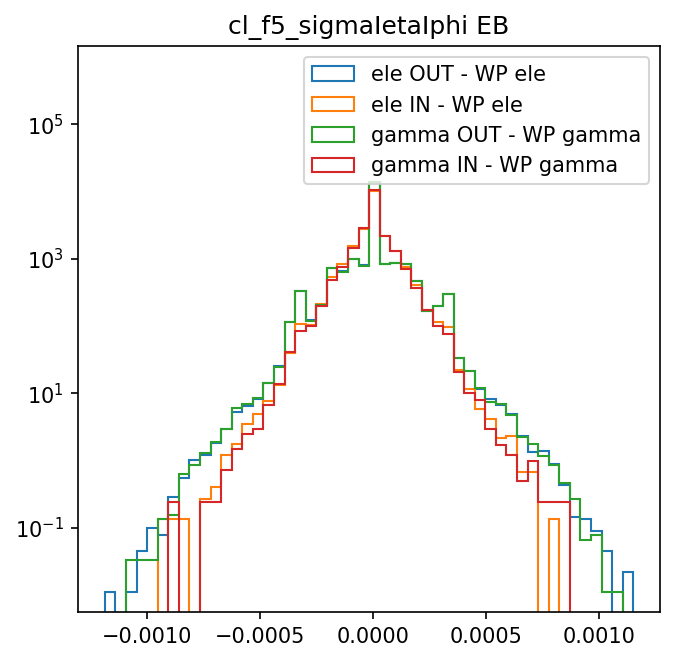

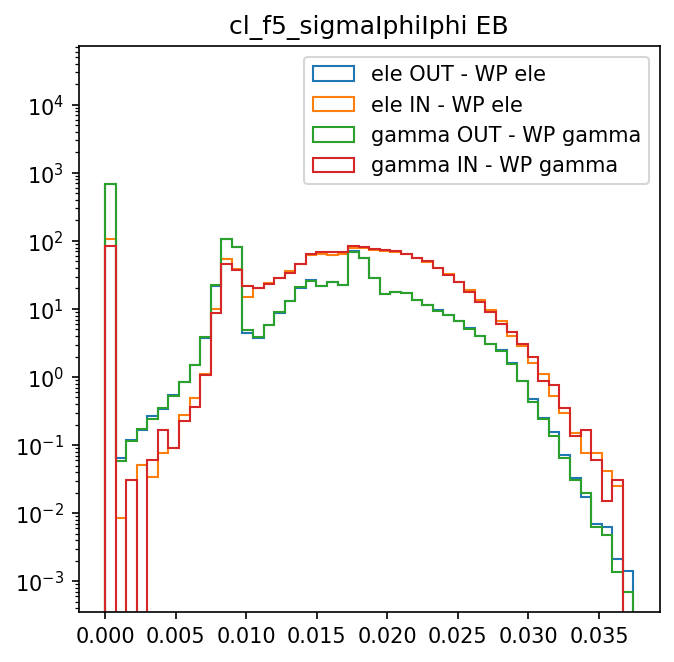

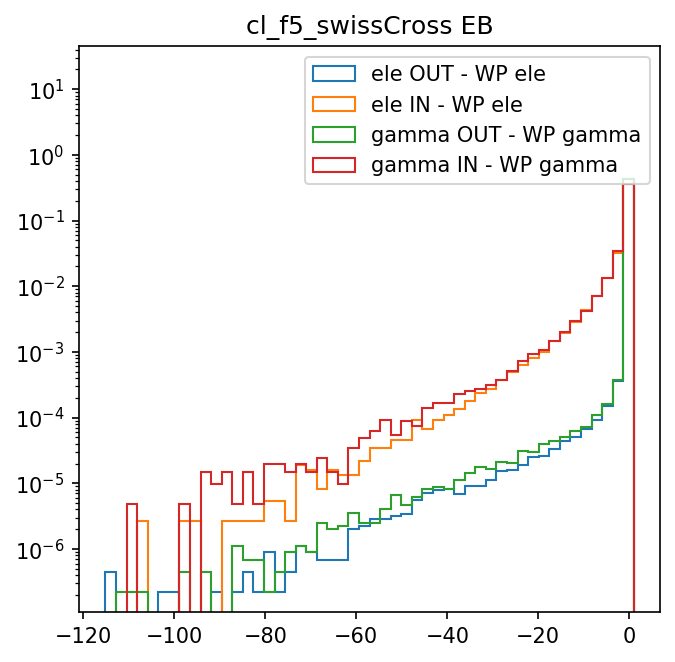

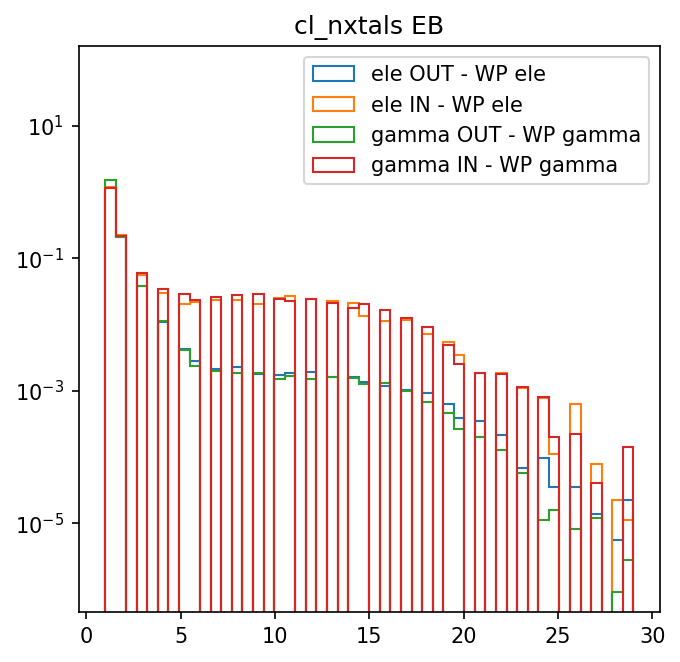

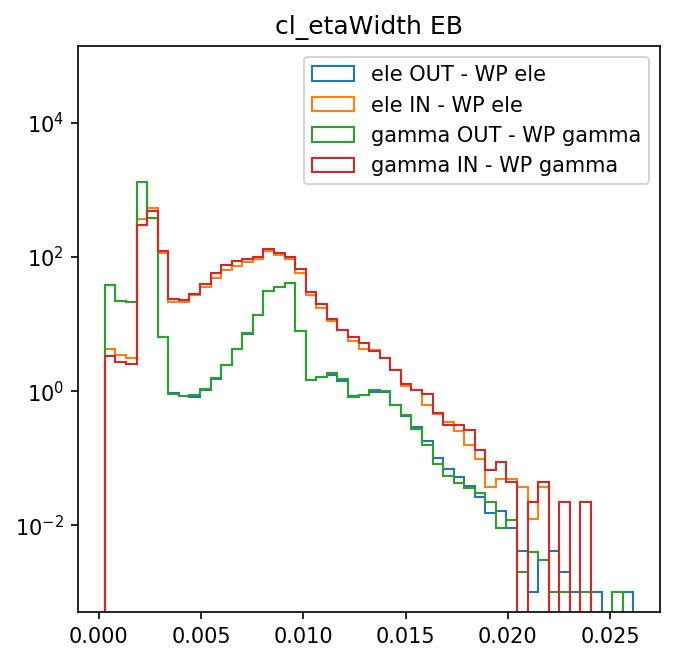

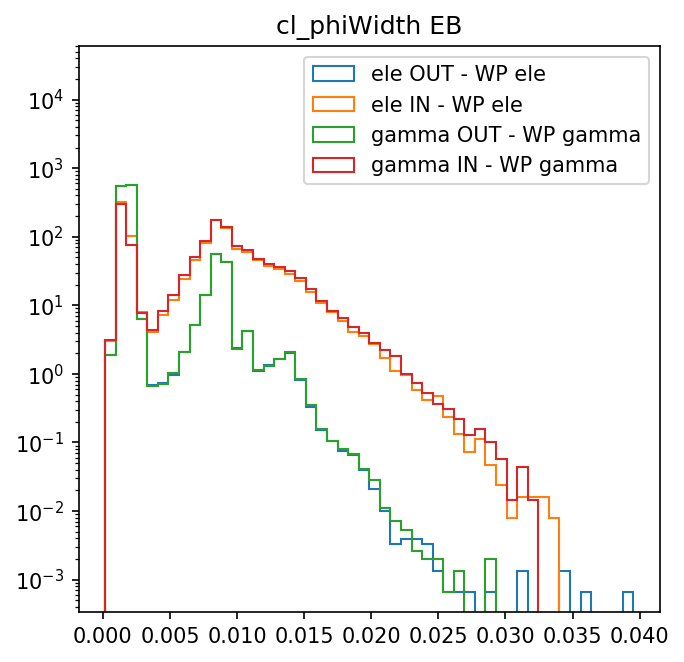

In [10]:
for col in cols:
    f = plt.figure()
    a = plt.hist(ele_wpele[(ele_wpele.seed_iz==0) & (ele_wpele.in_scluster==False) ][col], histtype="step",
                 density=True, bins=50,label="ele OUT - WP ele")

    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="ele OUT - WP gamma",range=(a[1][0], a[1][-1]))

    plt.hist(ele_wpele[(ele_wpele.seed_iz==0) & (ele_wpele.in_scluster) ][col], histtype="step",
                 density=True, bins=50,label="ele IN - WP ele",range=(a[1][0], a[1][-1]))


    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster) ][col], histtype="step",
    #             density=True, bins=50,label="ele IN - WP gamma",range=(a[1][0], a[1][-1]))

    #plt.hist(gamma_wpele[(gamma_wpele.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="gamma OUT - WP ele",range=(a[1][0], a[1][-1]))

    plt.hist(gamma_wpgamma[(gamma_wpgamma.seed_iz==0) & (gamma_wpgamma.in_scluster==False) ][col], histtype="step",
                 density=True, bins=50,label="gamma OUT - WP gamma",range=(a[1][0], a[1][-1]))

    #plt.hist(gamma_wpele[(gamma_wpele.in_scluster) ][col], histtype="step",
     #            density=True, bins=50,label="gamma IN - WP ele",range=(a[1][0], a[1][-1]))


    plt.hist(gamma_wpgamma[(gamma_wpgamma.seed_iz==0) & (gamma_wpgamma.in_scluster) ][col], histtype="step",
                 density=True, bins=50,label="gamma IN - WP gamma",range=(a[1][0], a[1][-1]))

    bottom,top = plt.ylim()


    plt.yscale("log")

    plt.ylim(top=top*100)
    plt.title(col +" EB")
    plt.legend()
    plt.savefig(output_dir+"/input_vars_inout_EB_{}.png".format(col))

    plt.show()
    plt.close(f)

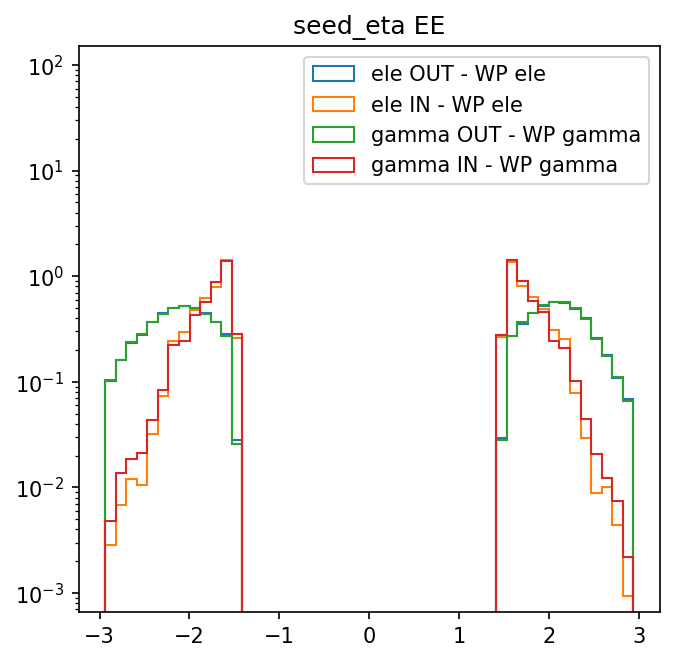

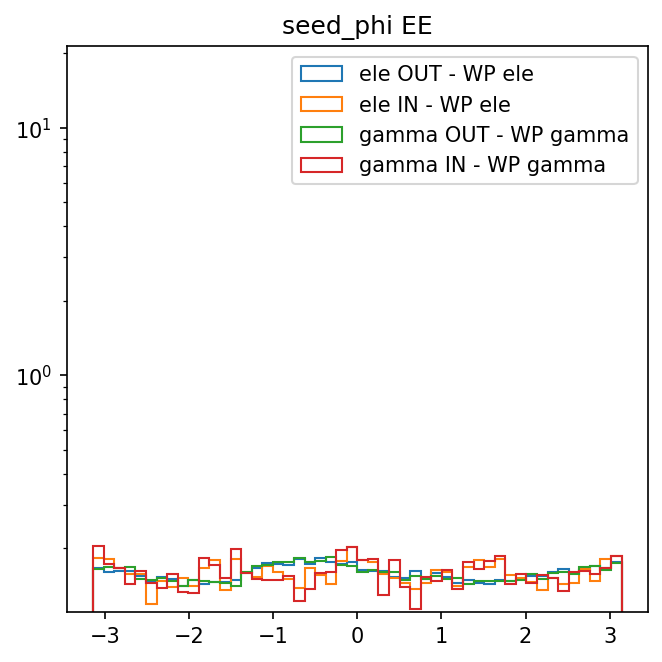

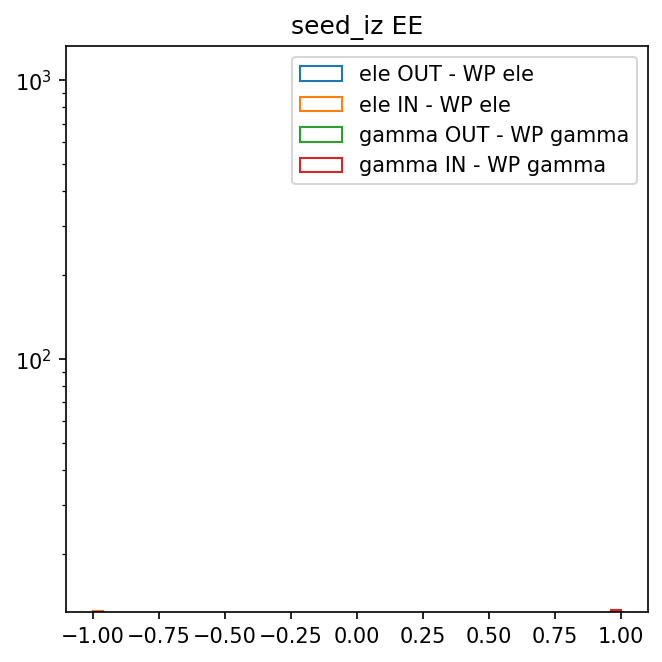

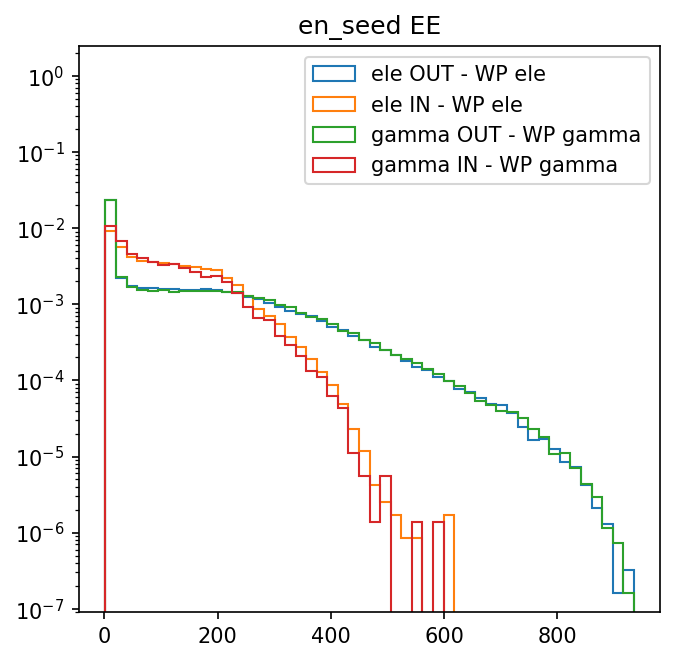

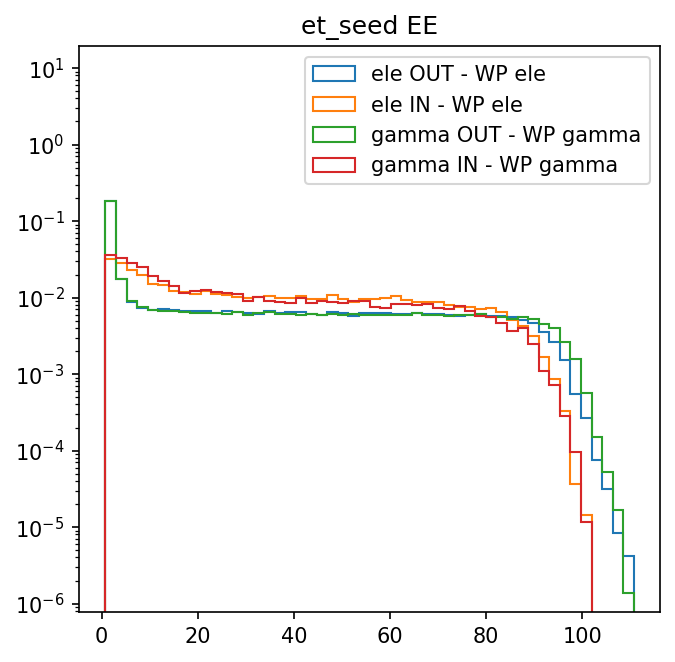

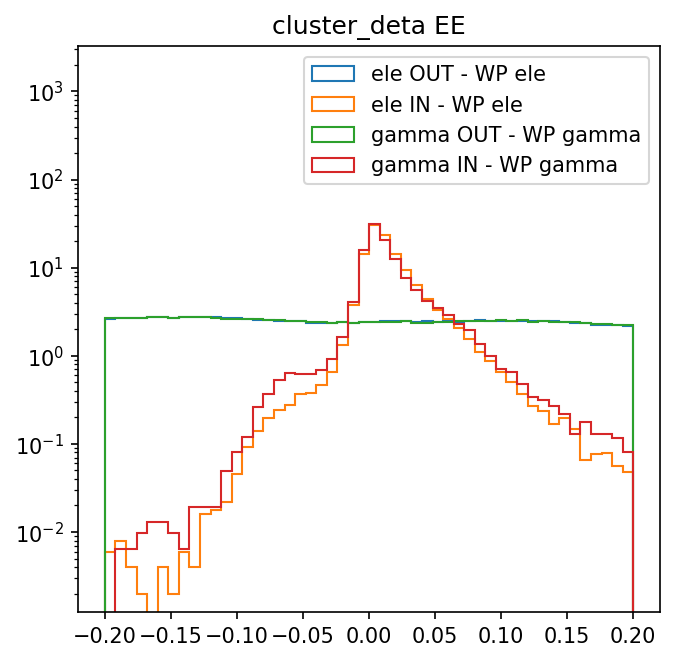

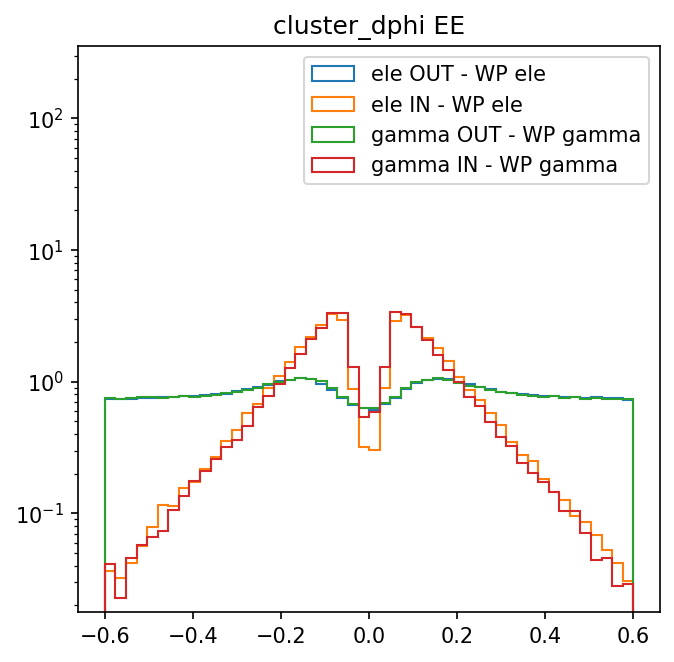

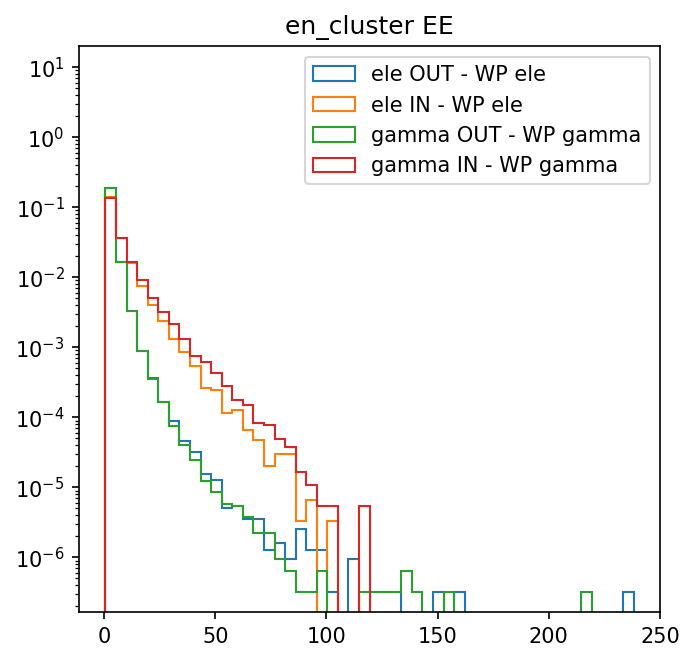

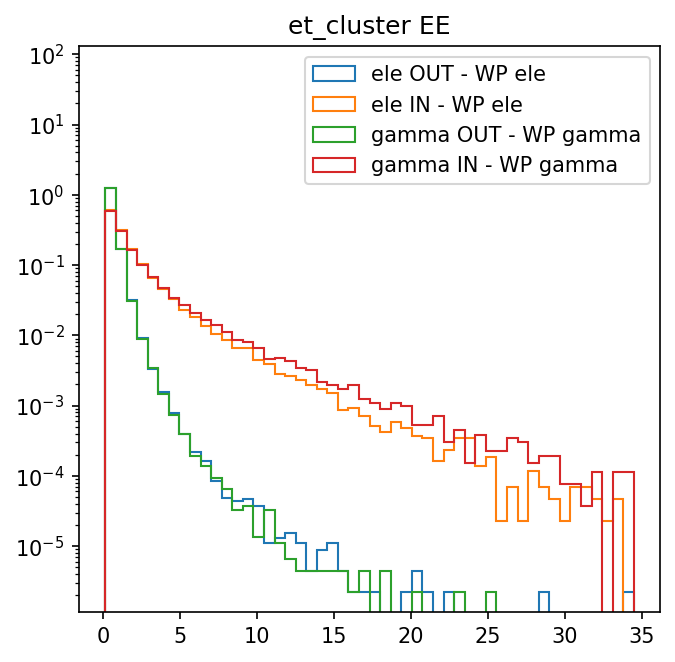

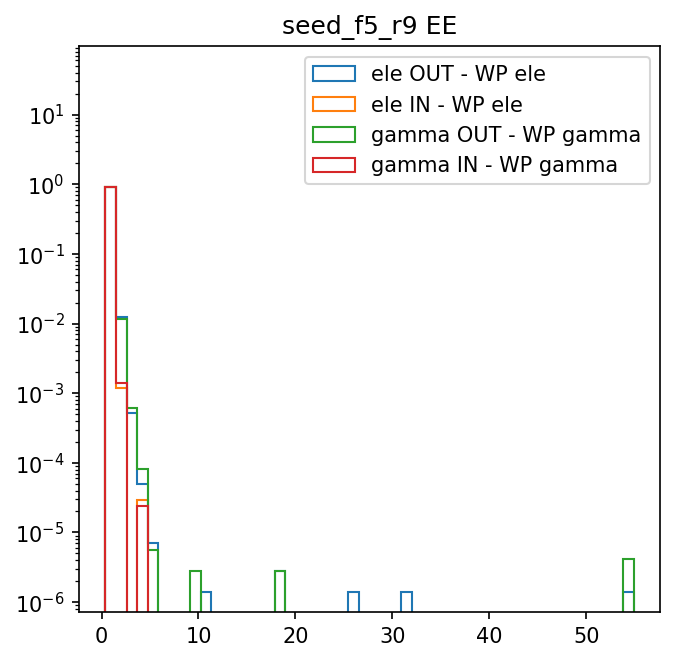

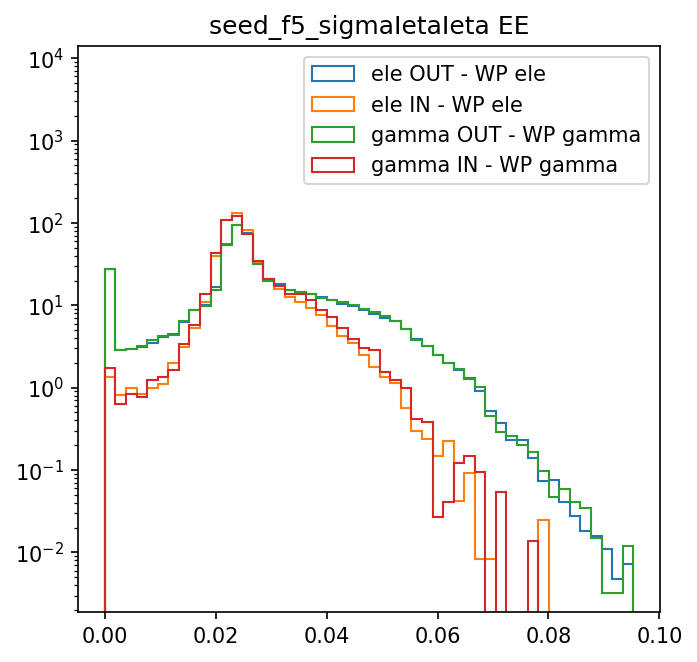

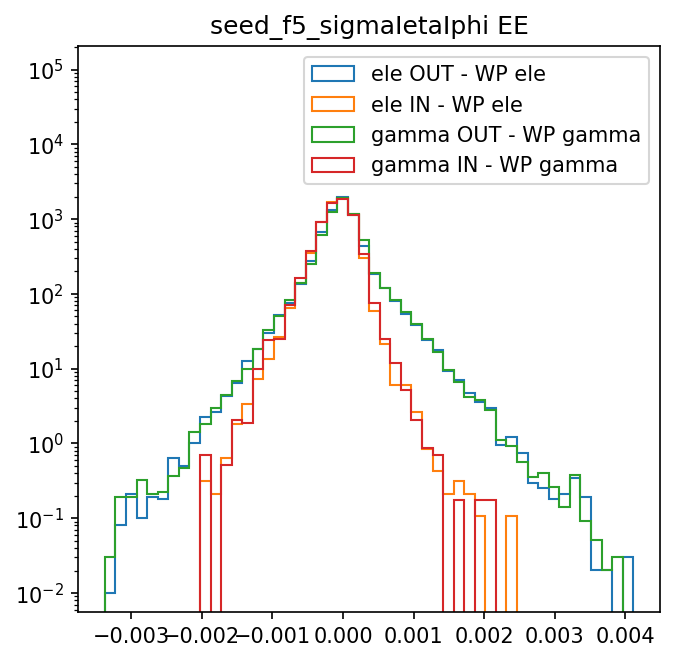

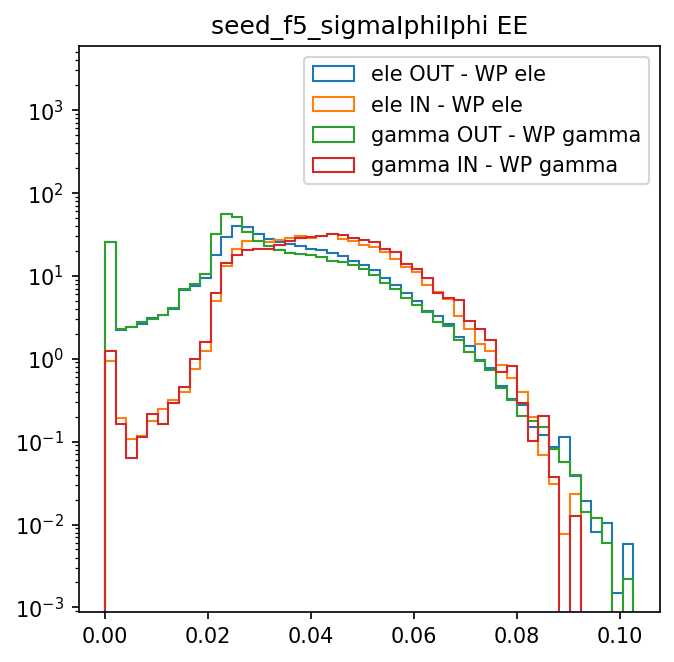

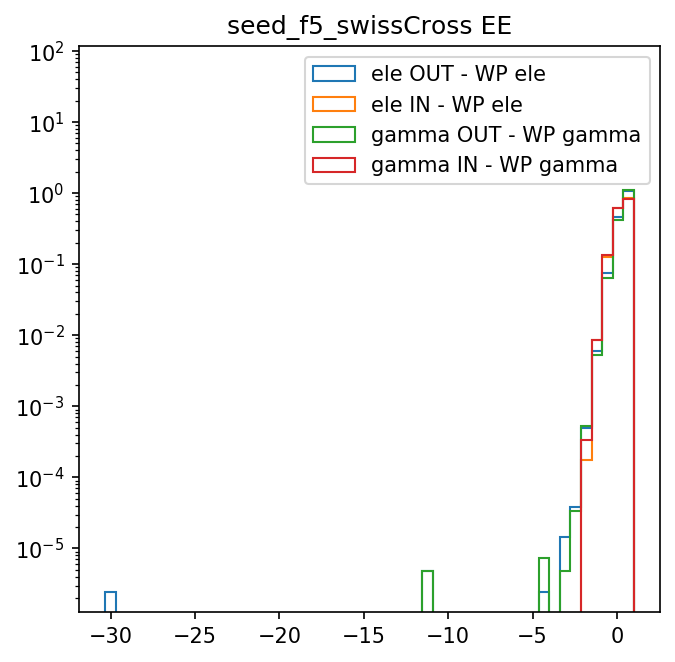

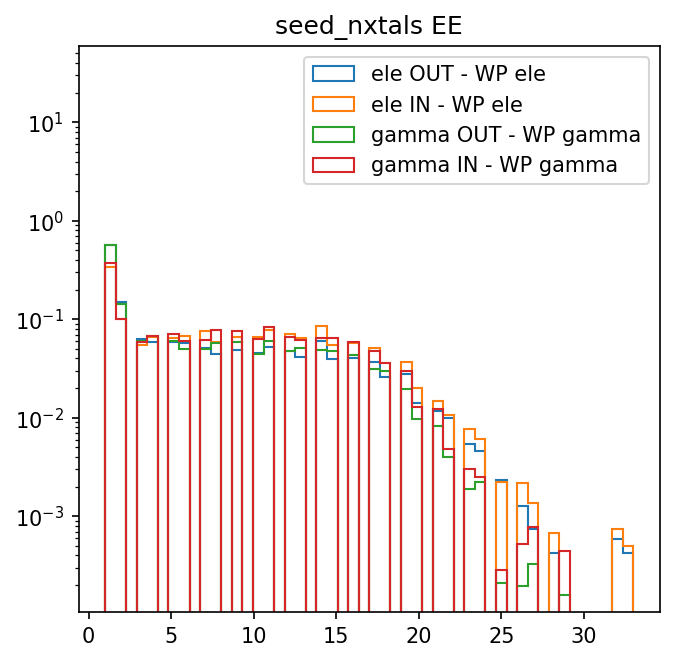

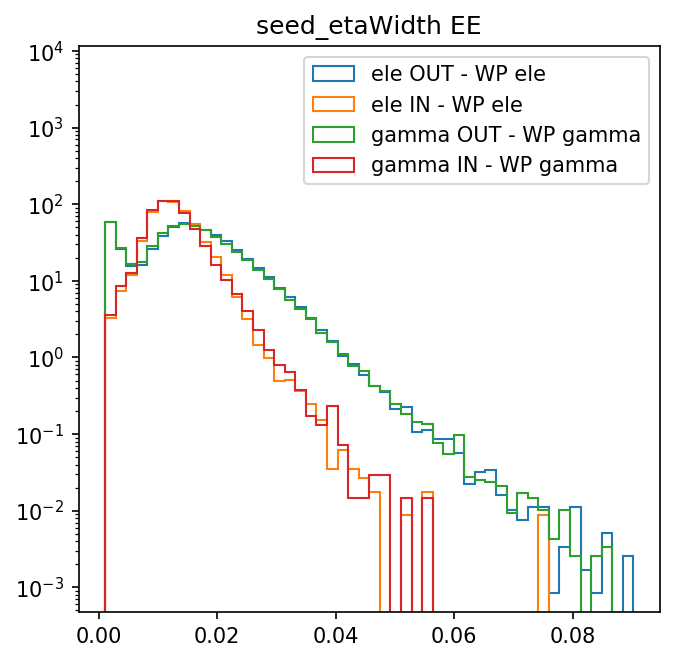

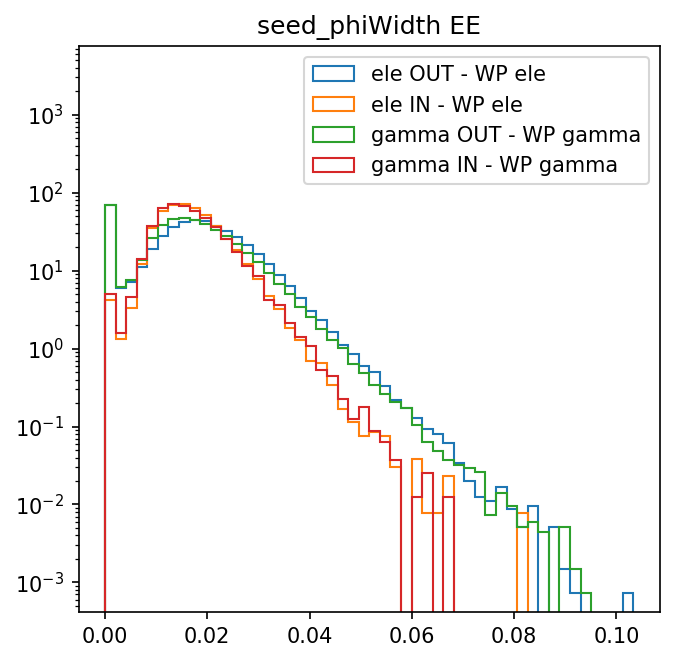

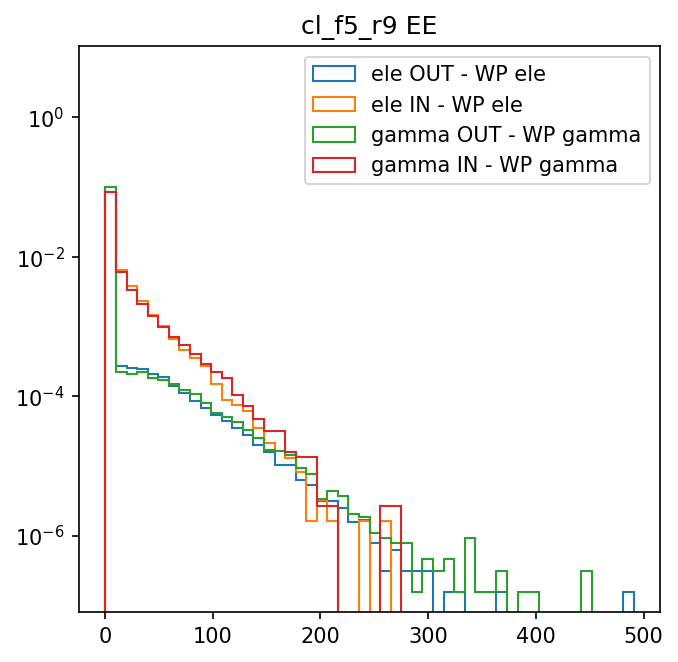

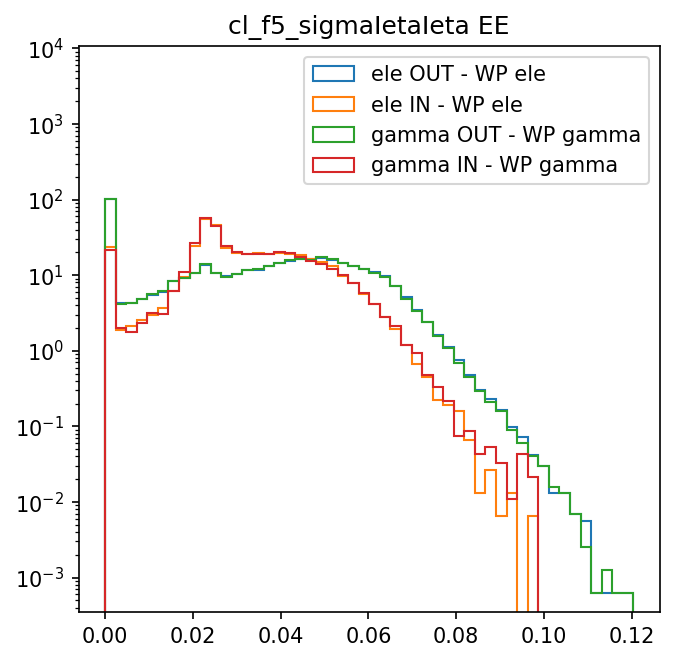

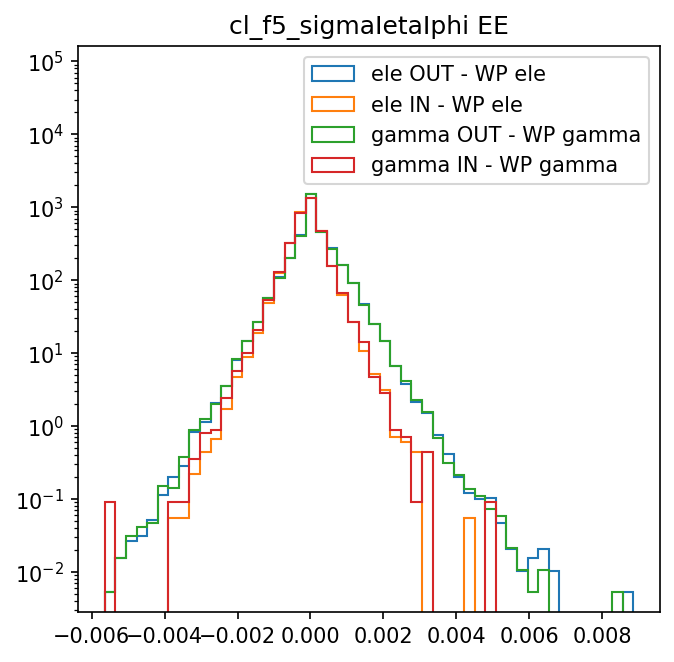

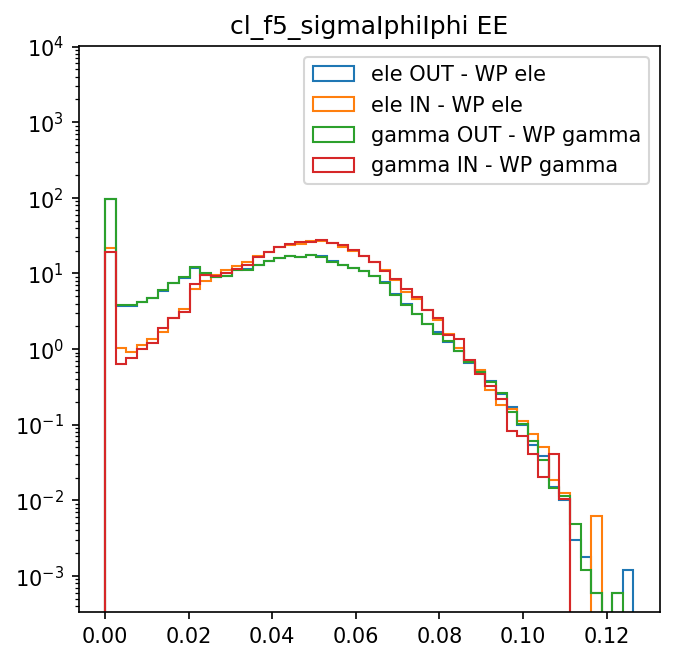

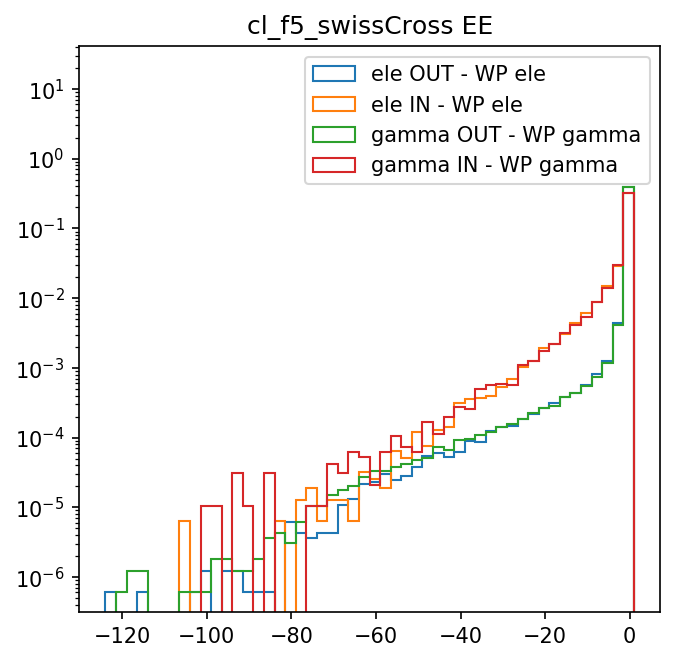

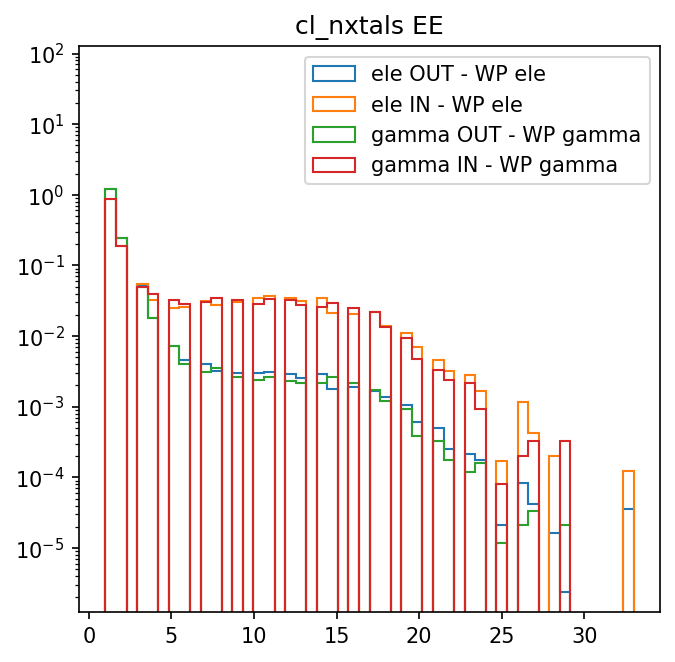

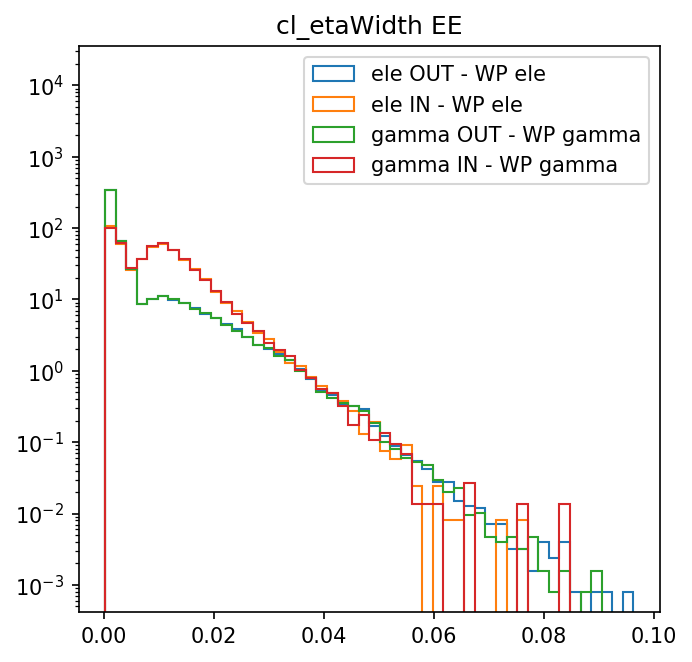

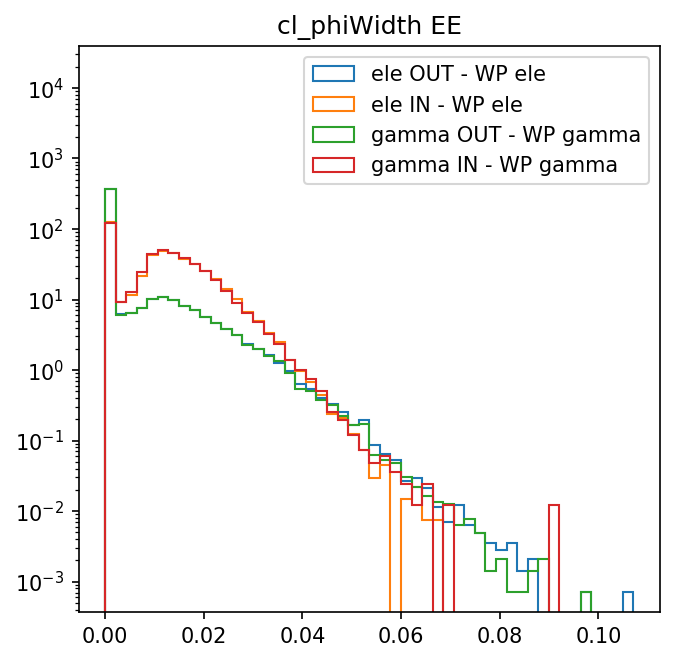

In [11]:
for col in cols:
    f = plt.figure()
    a = plt.hist(ele_wpele[(ele_wpele.seed_iz!=0) & (ele_wpele.in_scluster==False) ][col], histtype="step",
                 density=True, bins=50,label="ele OUT - WP ele")

    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="ele OUT - WP gamma",range=(a[1][0], a[1][-1]))

    plt.hist(ele_wpele[(ele_wpele.seed_iz!=0) & (ele_wpele.in_scluster) ][col], histtype="step",
                 density=True, bins=50,label="ele IN - WP ele",range=(a[1][0], a[1][-1]))


    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster) ][col], histtype="step",
    #             density=True, bins=50,label="ele IN - WP gamma",range=(a[1][0], a[1][-1]))

    #plt.hist(gamma_wpele[(gamma_wpele.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="gamma OUT - WP ele",range=(a[1][0], a[1][-1]))

    plt.hist(gamma_wpgamma[(gamma_wpgamma.seed_iz!=0) & (gamma_wpgamma.in_scluster==False) ][col], histtype="step",
                 density=True, bins=50,label="gamma OUT - WP gamma",range=(a[1][0], a[1][-1]))

    #plt.hist(gamma_wpele[(gamma_wpele.in_scluster) ][col], histtype="step",
     #            density=True, bins=50,label="gamma IN - WP ele",range=(a[1][0], a[1][-1]))


    plt.hist(gamma_wpgamma[(gamma_wpgamma.seed_iz!=0) & (gamma_wpgamma.in_scluster) ][col], histtype="step",
                 density=True, bins=50,label="gamma IN - WP gamma",range=(a[1][0], a[1][-1]))

    bottom,top = plt.ylim()


    plt.yscale("log")

    plt.ylim(top=top*100)
    plt.title(col +" EE")
    plt.legend()
    plt.savefig(output_dir+"/input_vars_inout_EE_{}.png".format(col))

    plt.show()
    plt.close(f)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


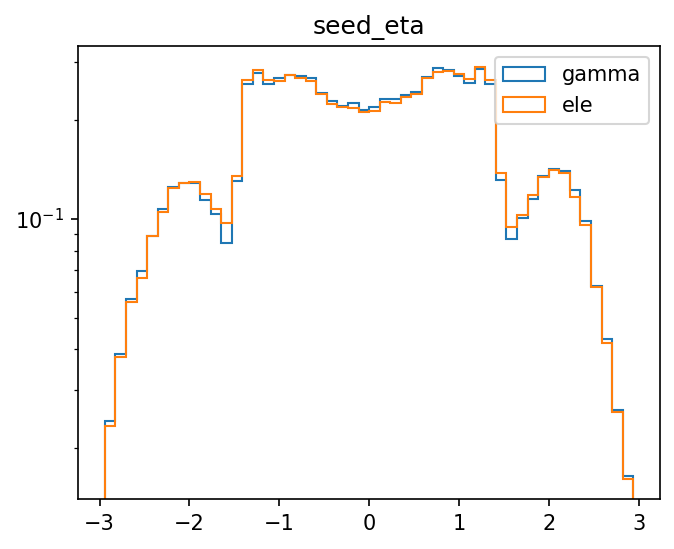

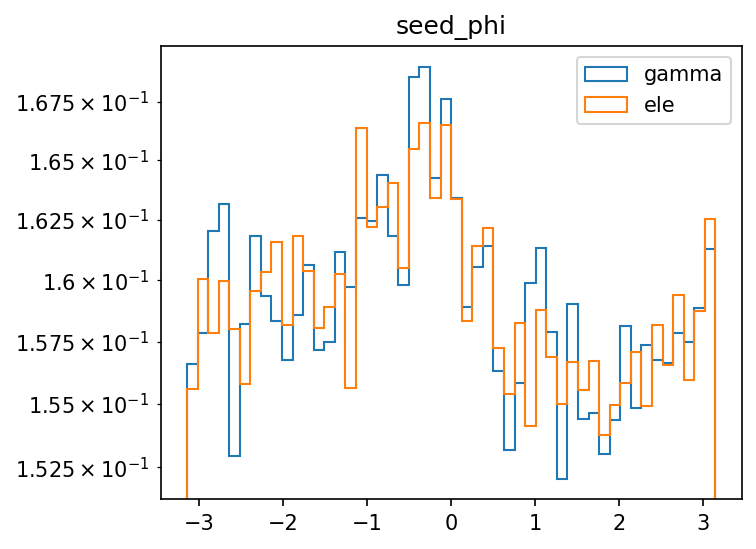

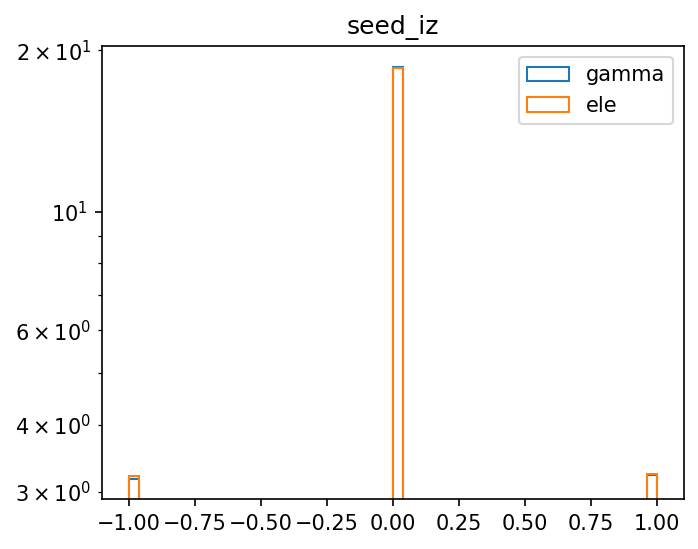

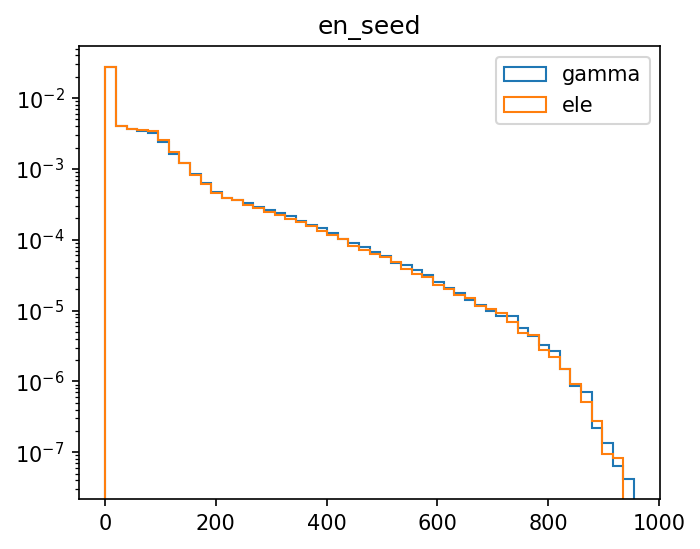

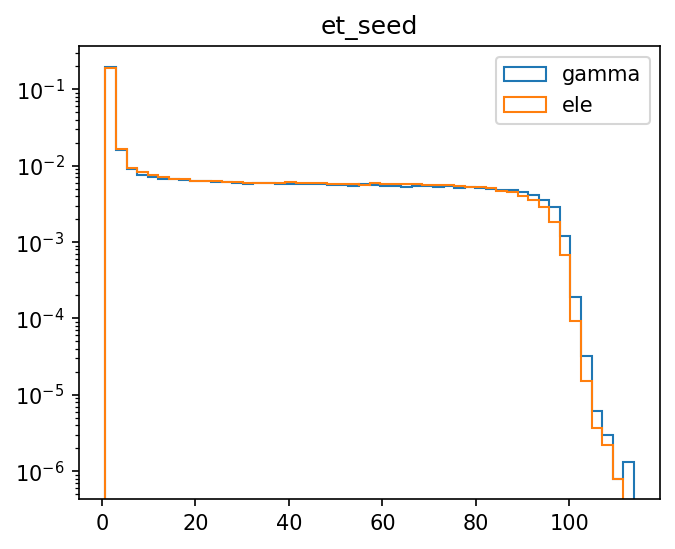

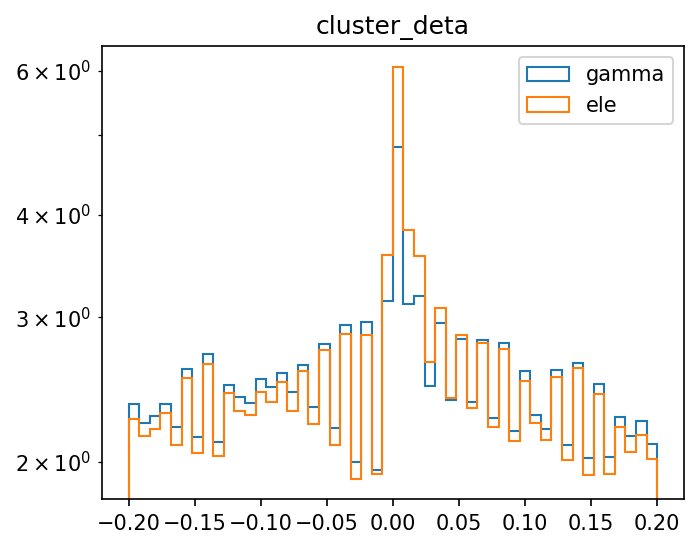

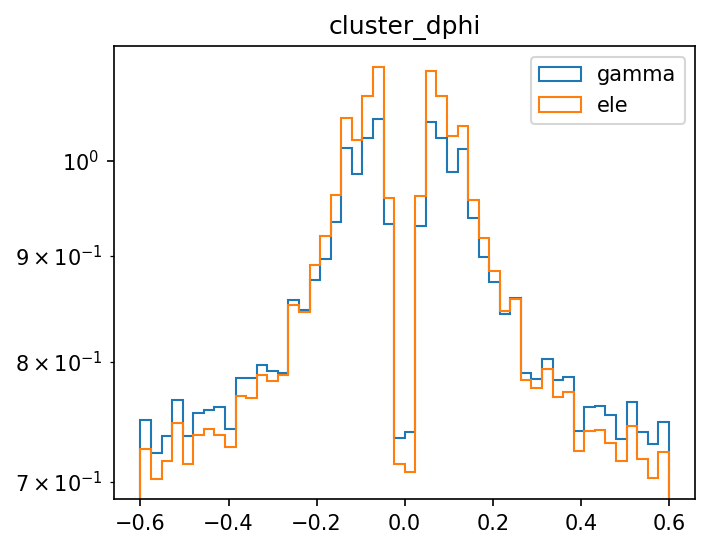

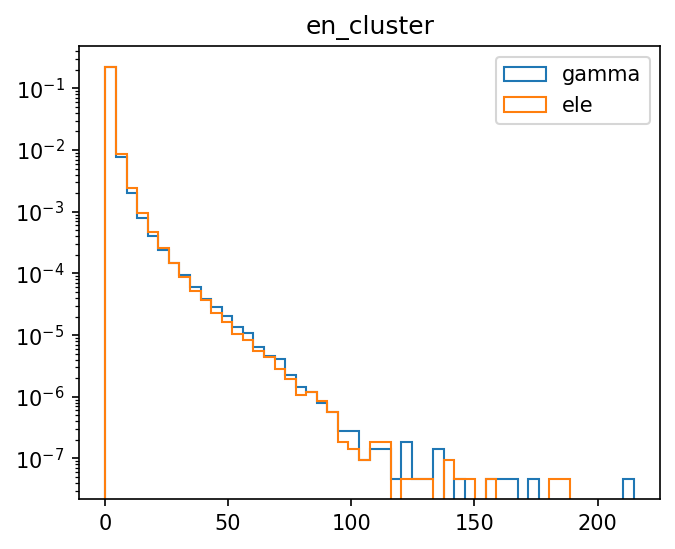

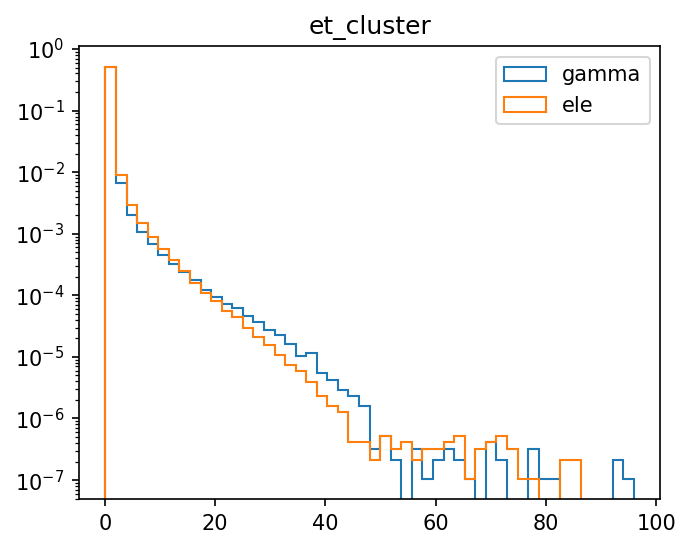

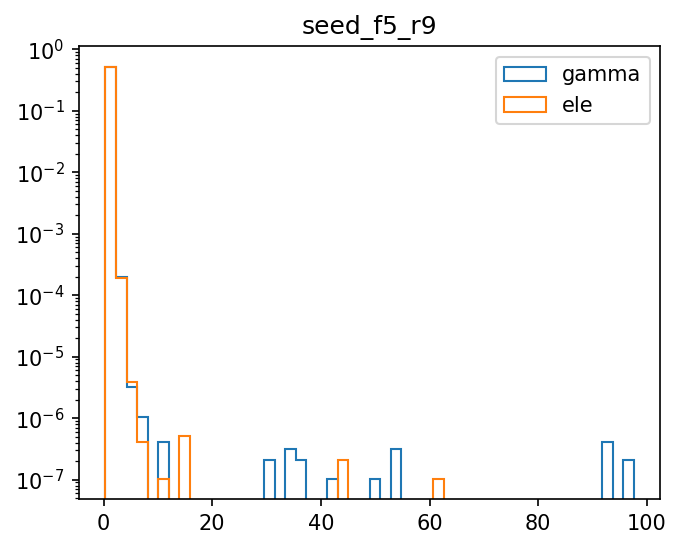

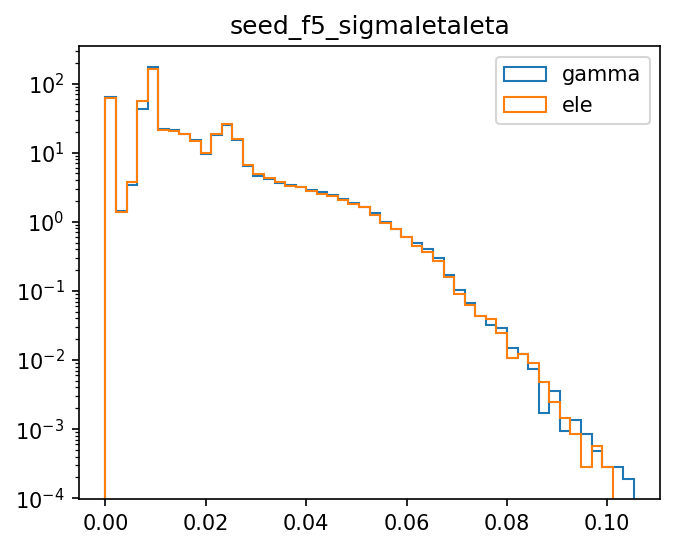

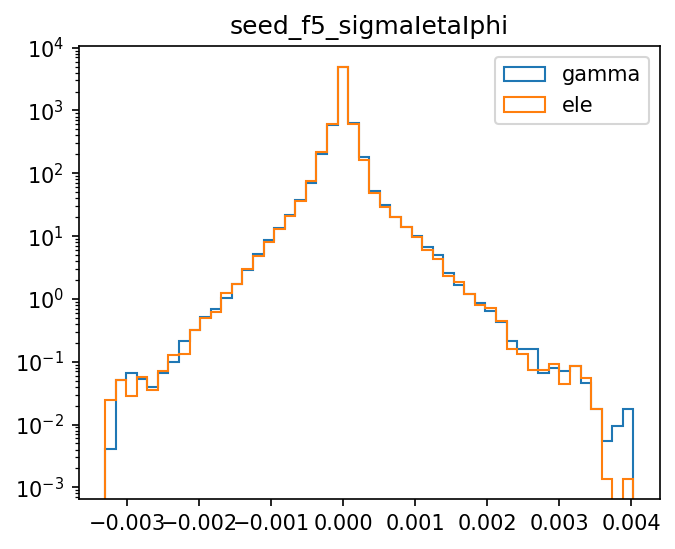

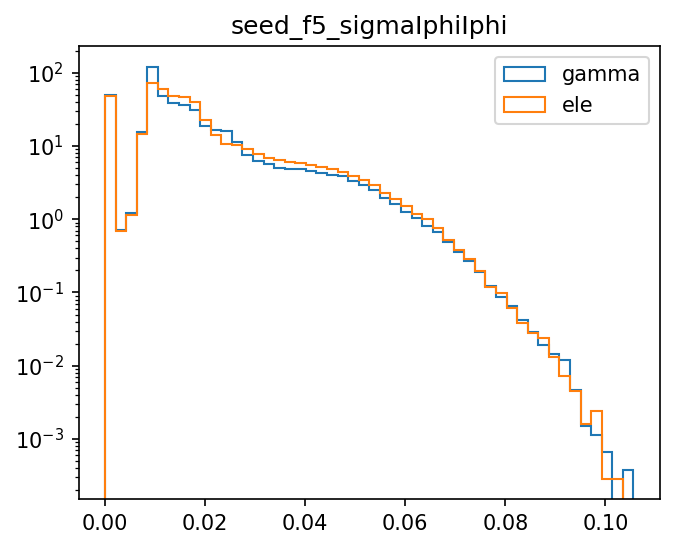

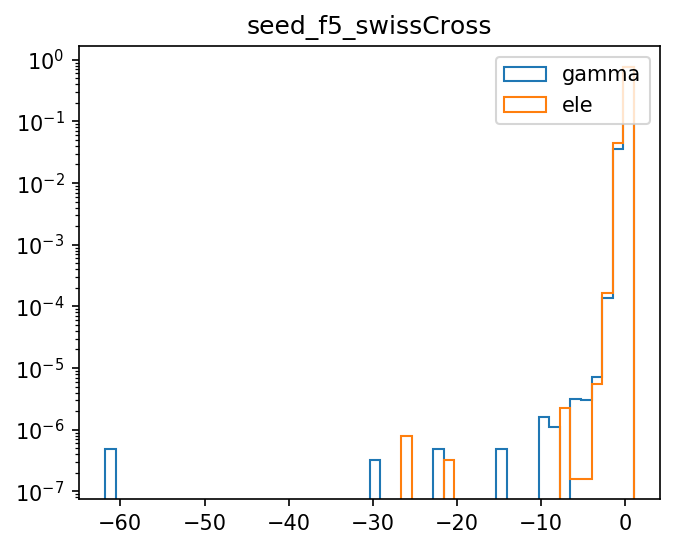

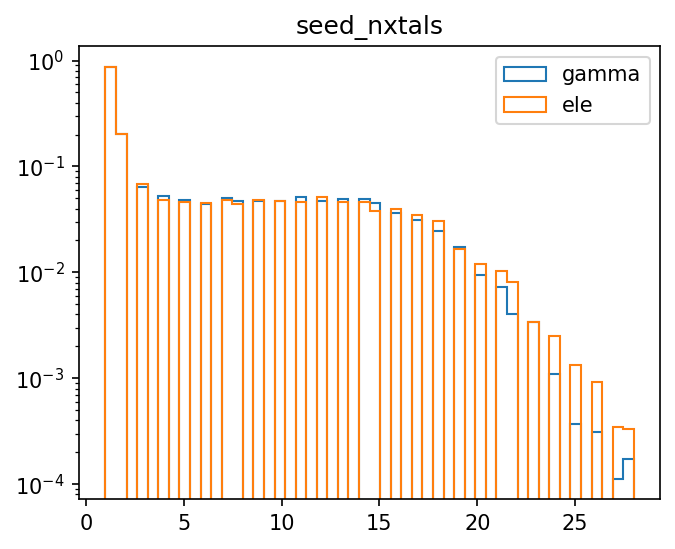

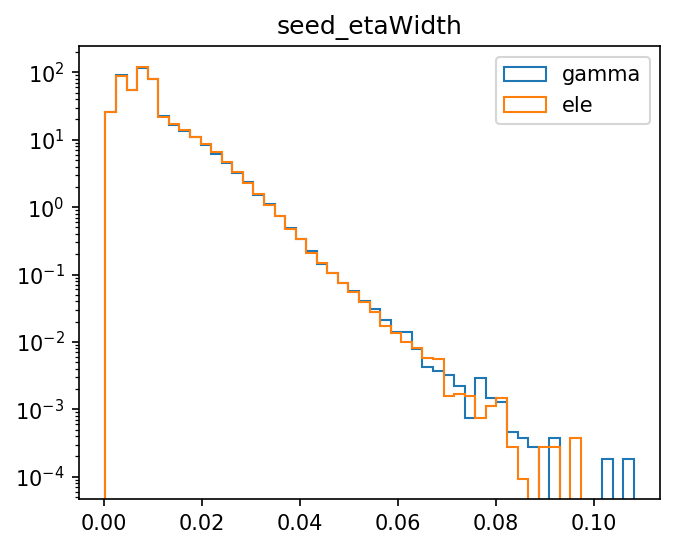

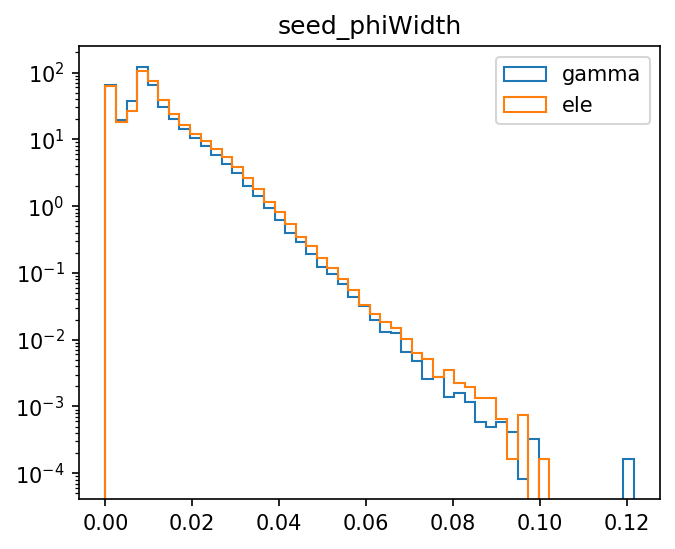

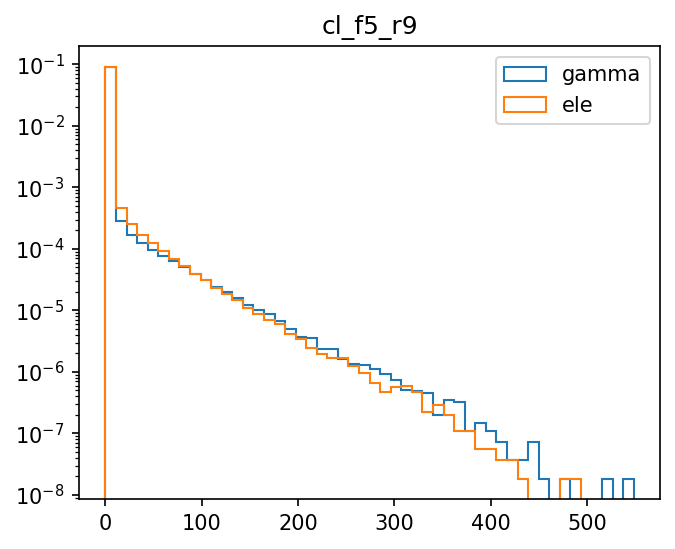

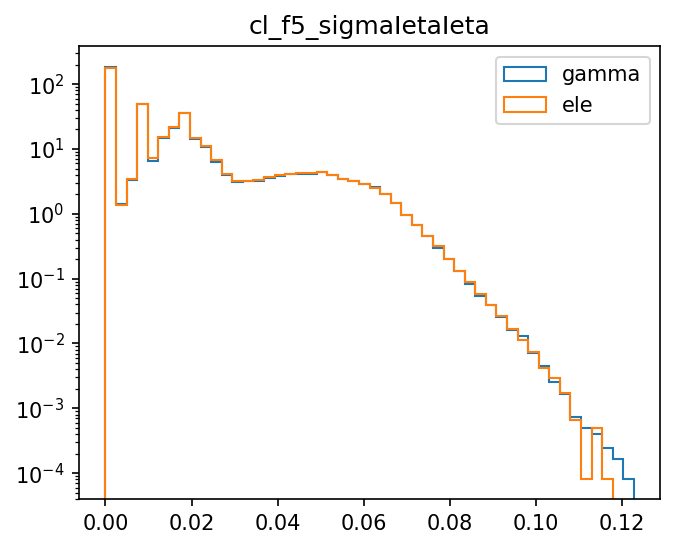

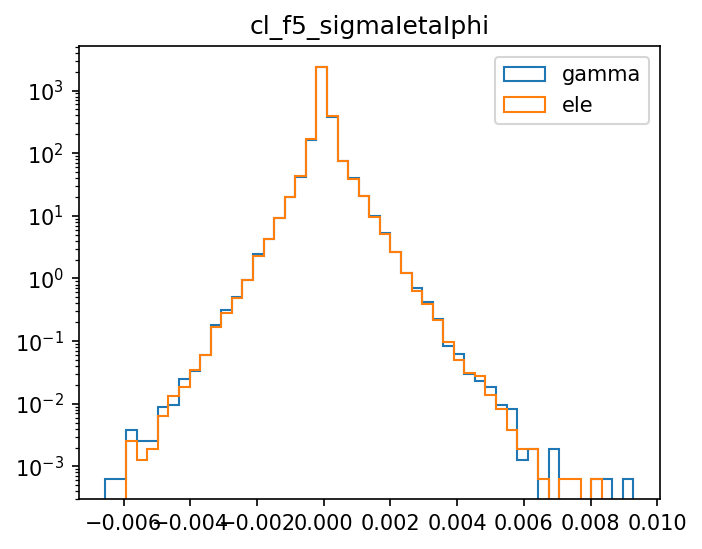

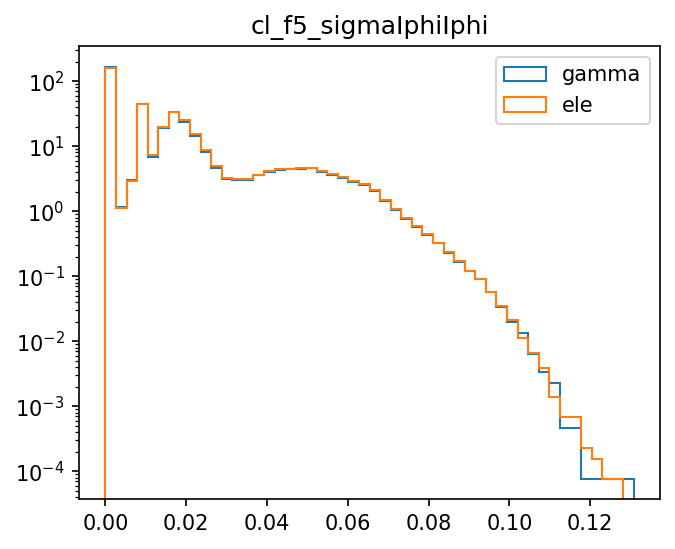

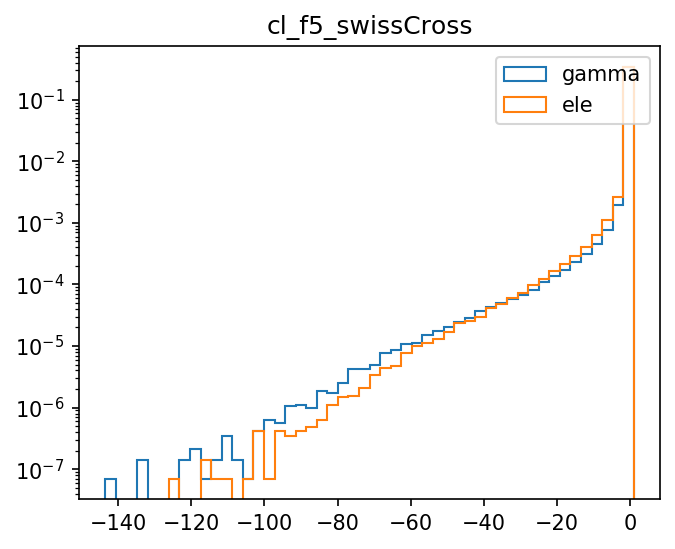

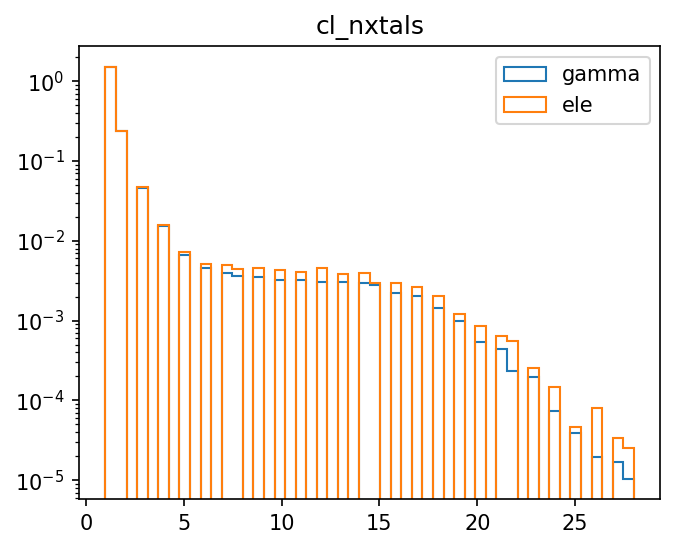

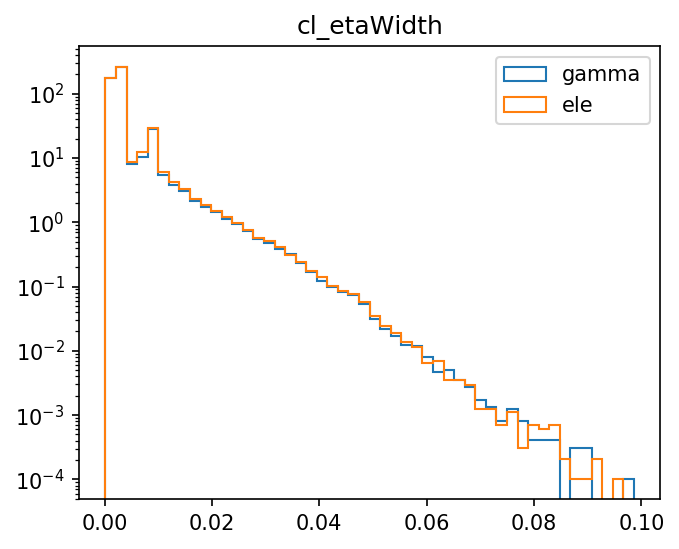

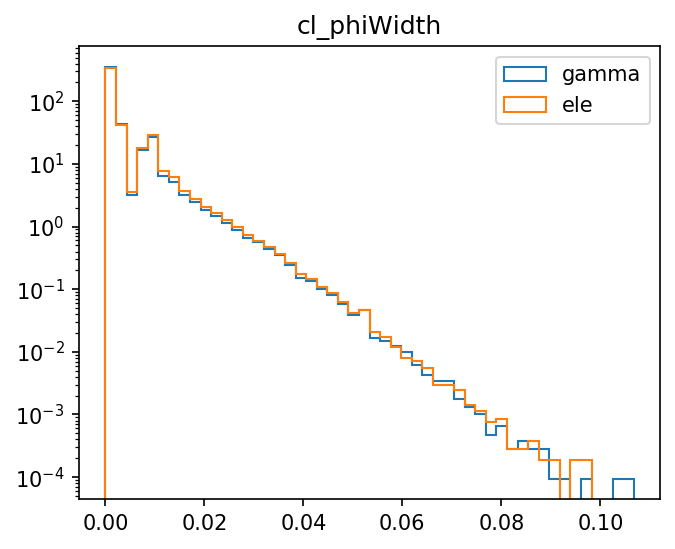

In [25]:
for col in cols:
    f = plt.figure()
    a = plt.hist(data[data.particle=="gamma"][col], histtype="step",
                 density=True, bins=50,label="gamma")
    plt.hist(data[data.particle=="electron"][col], histtype="step", 
                 density=True, bins=50,label="ele", range=(a[1][0], a[1][-1]))
    plt.yscale("log")
    plt.title(col)
    plt.legend()
    plt.savefig(model_dir+"/input_{}.png".format(col))

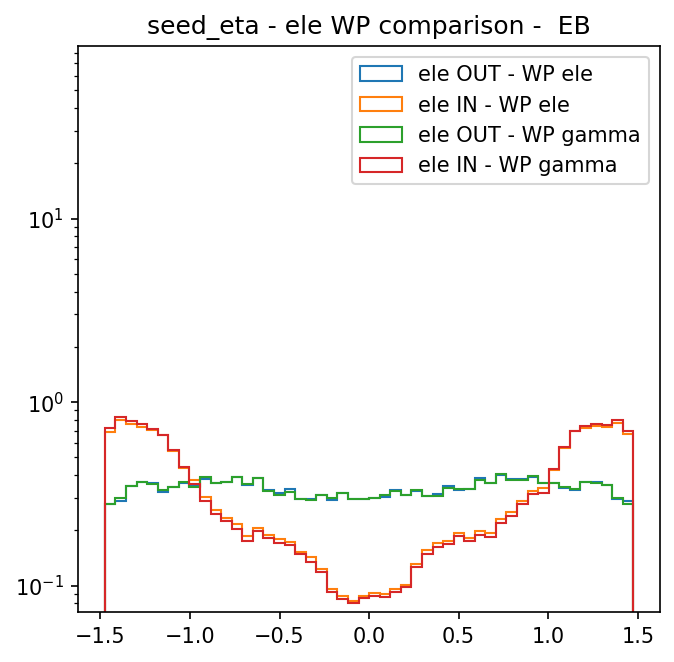

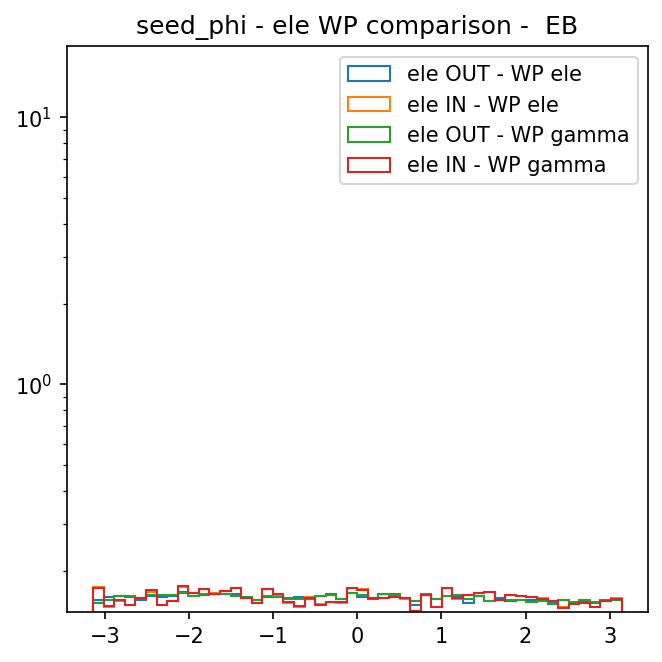

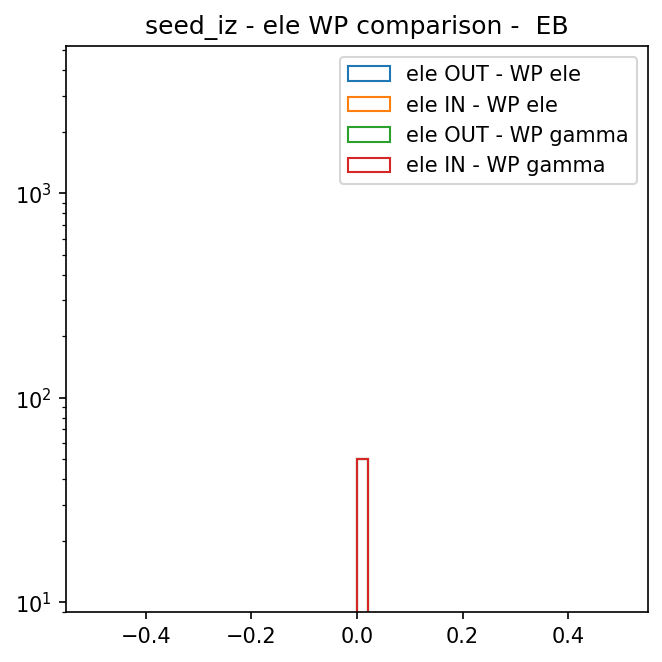

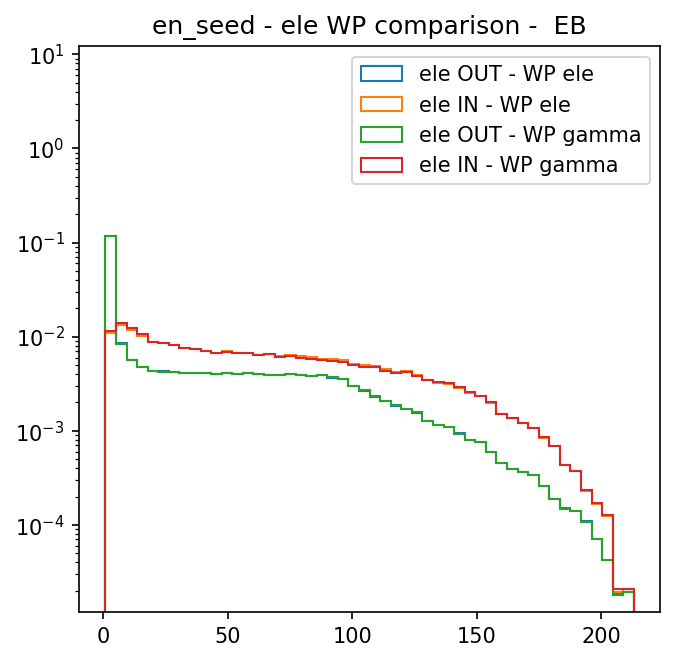

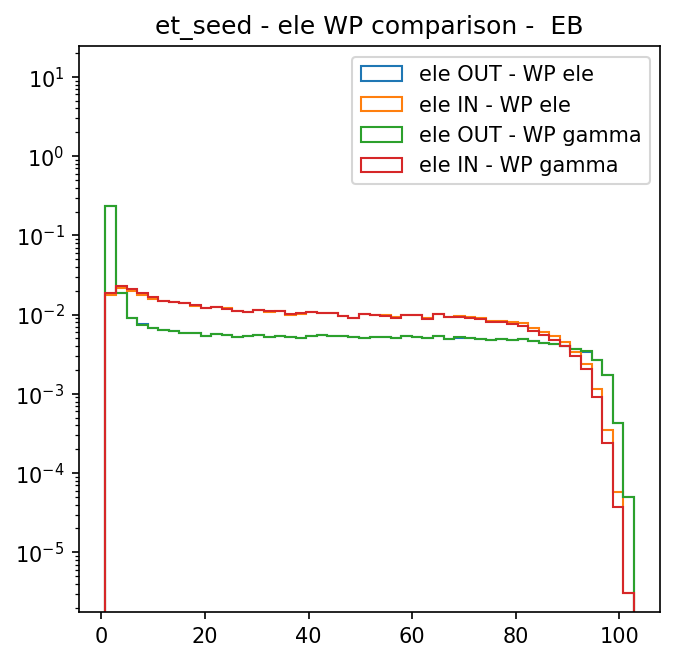

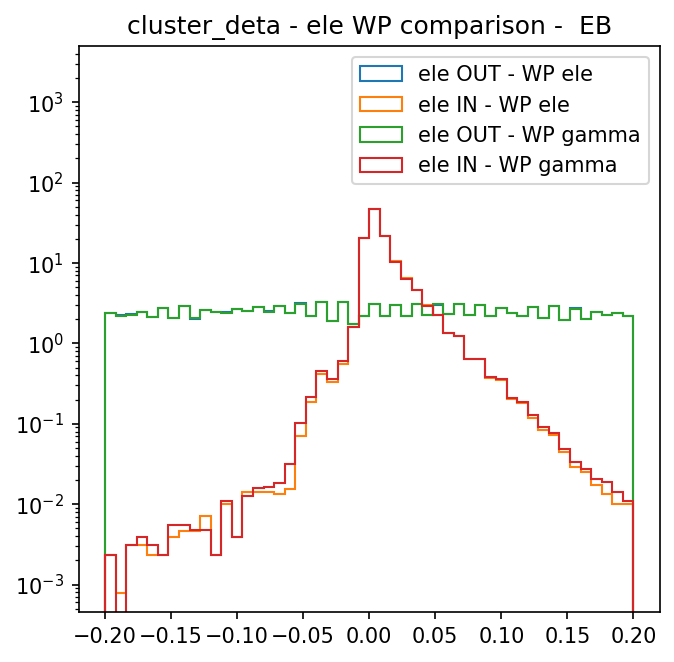

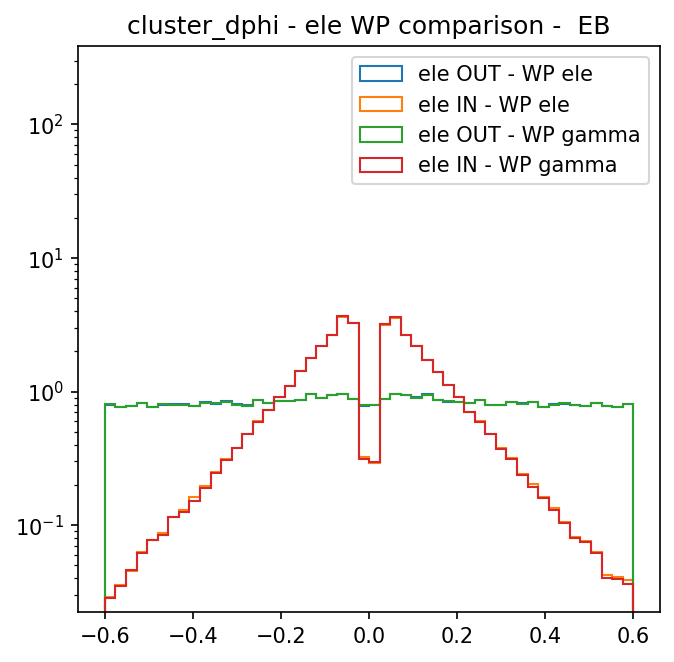

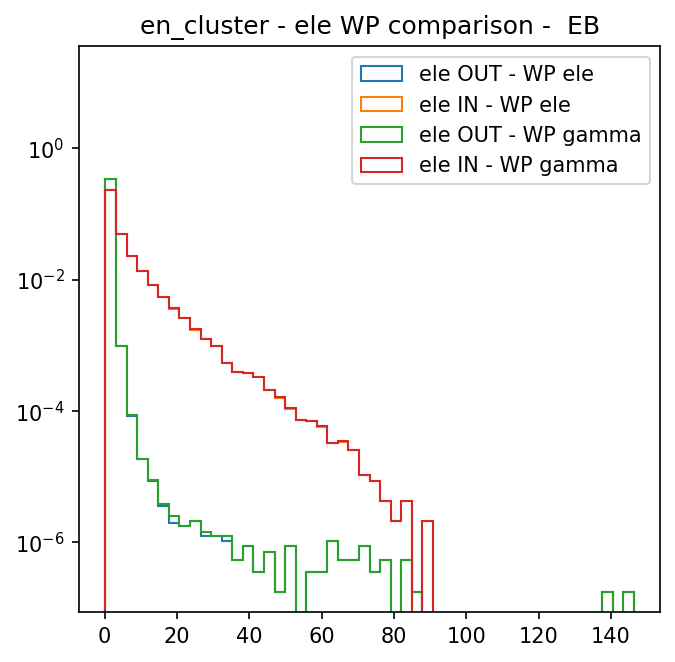

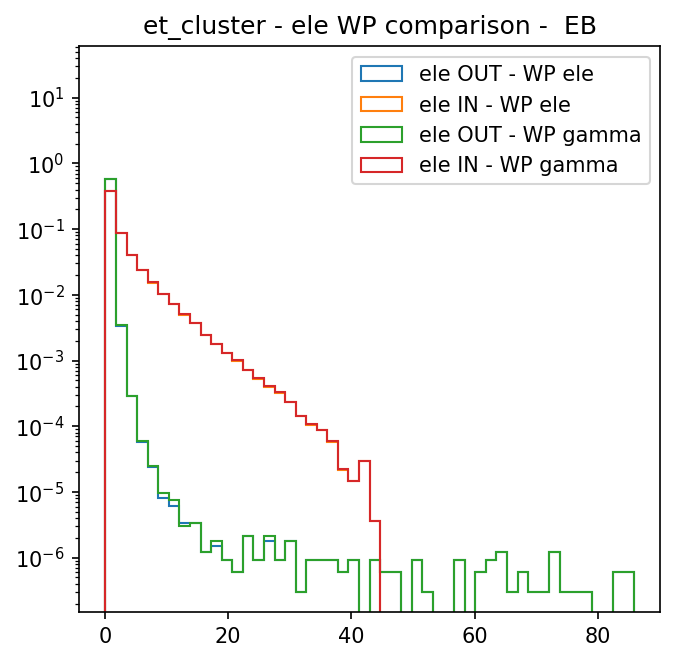

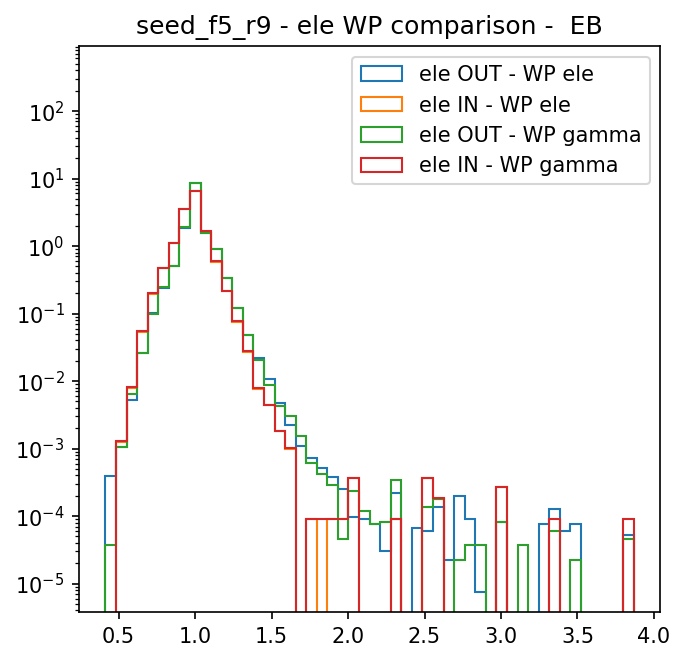

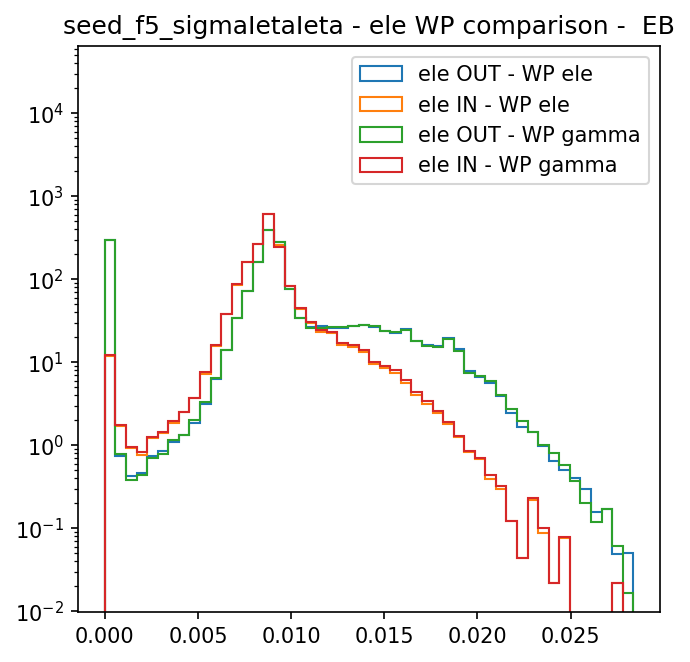

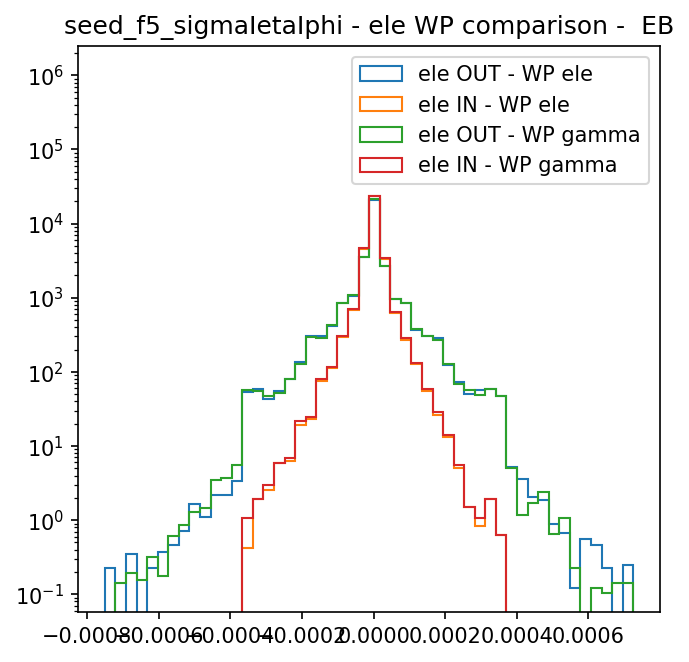

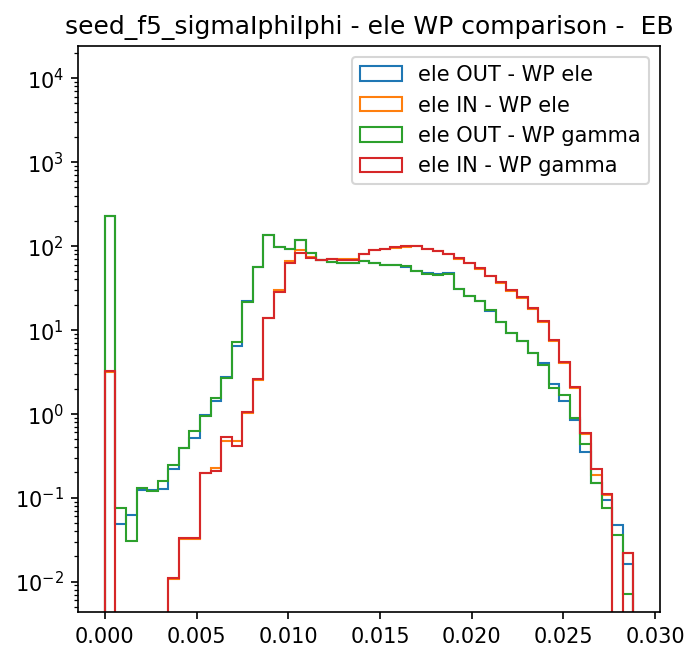

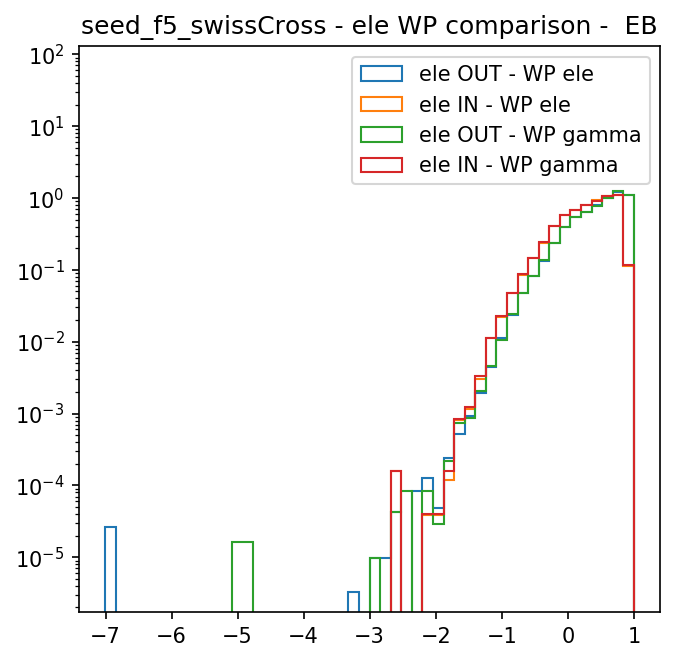

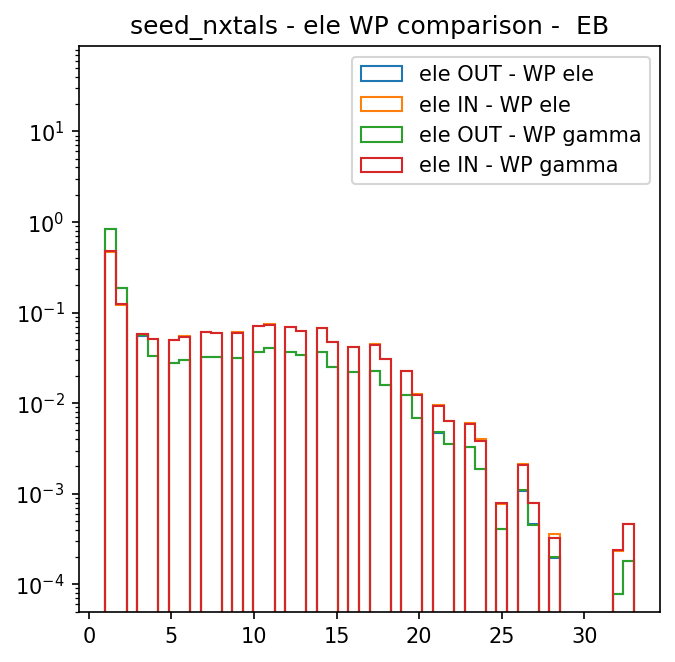

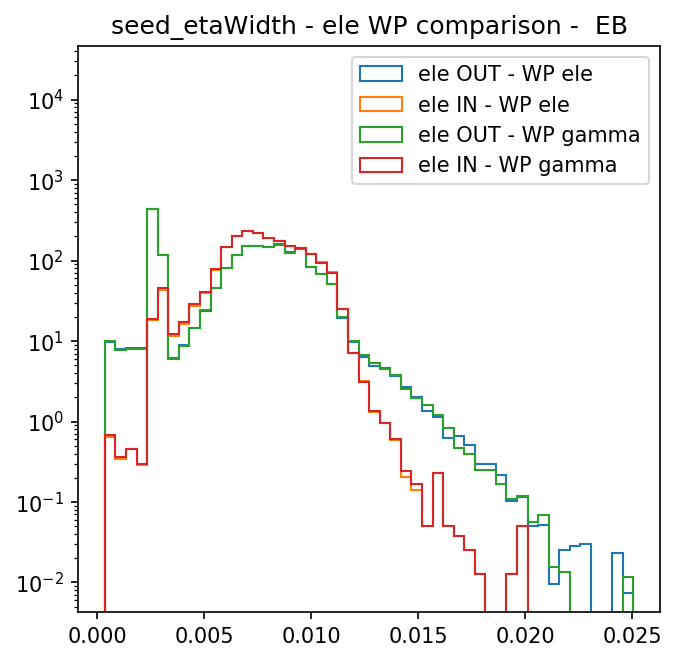

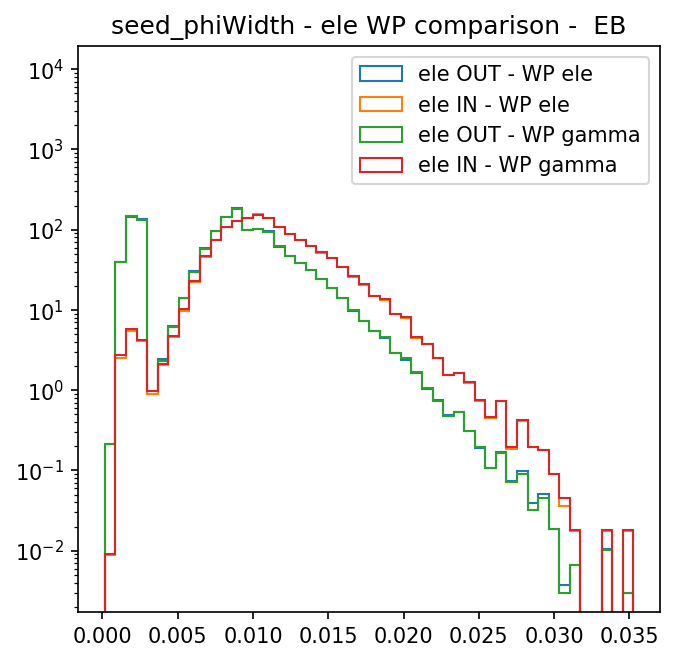

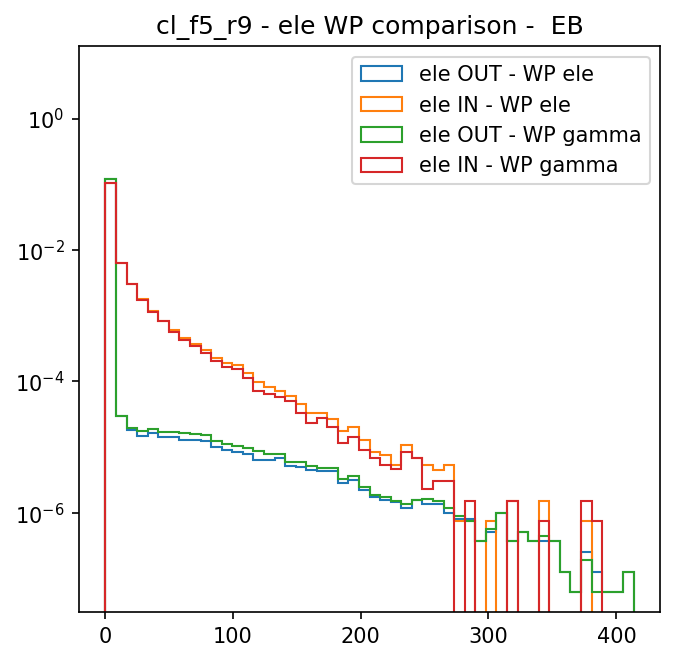

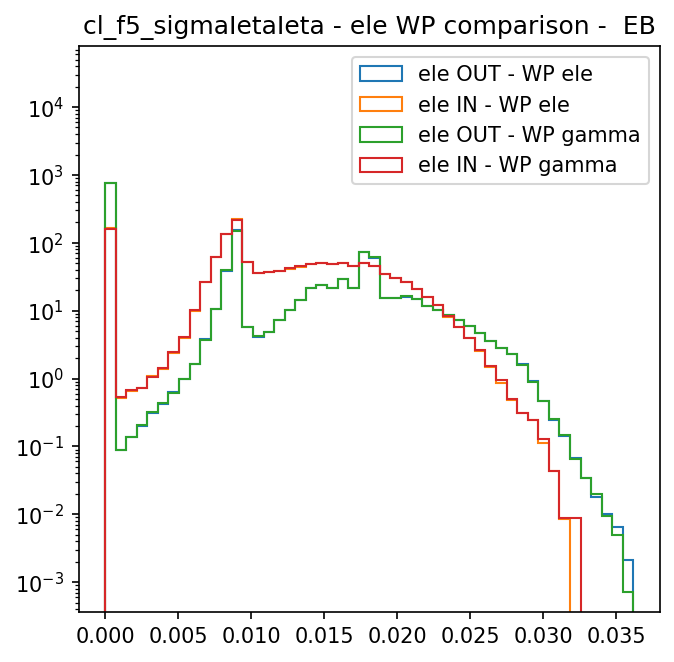

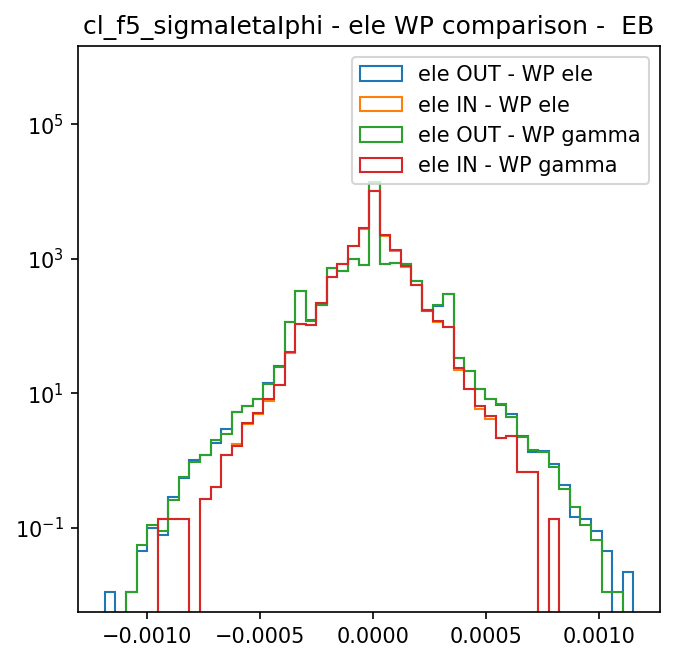

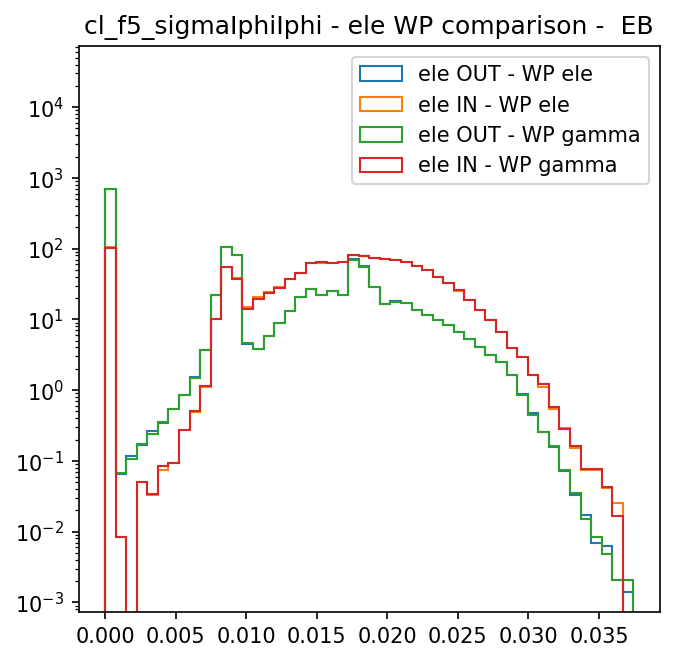

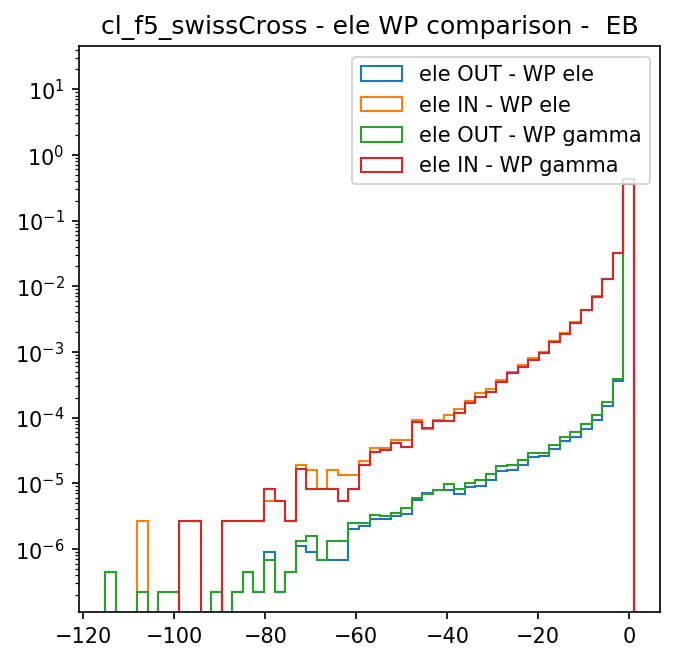

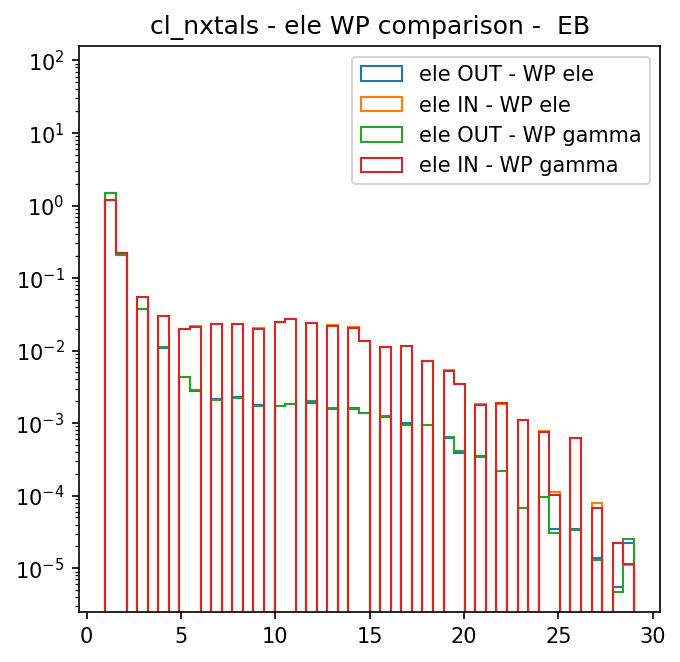

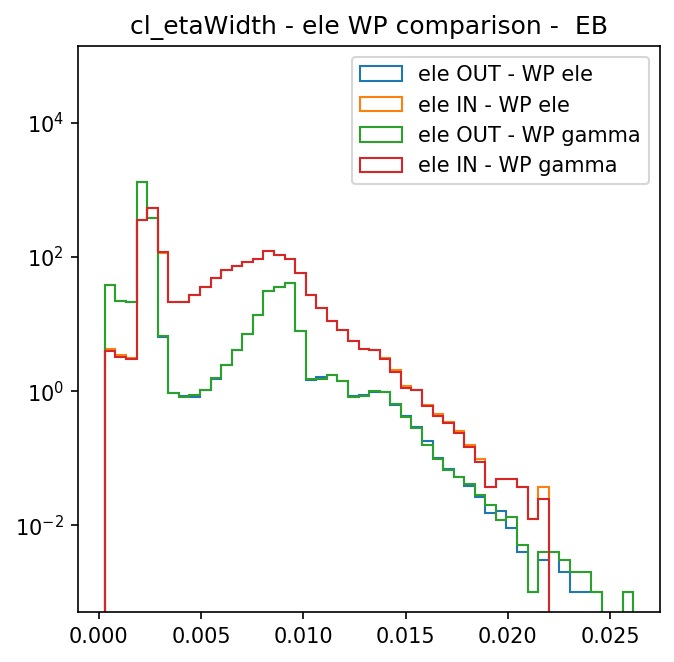

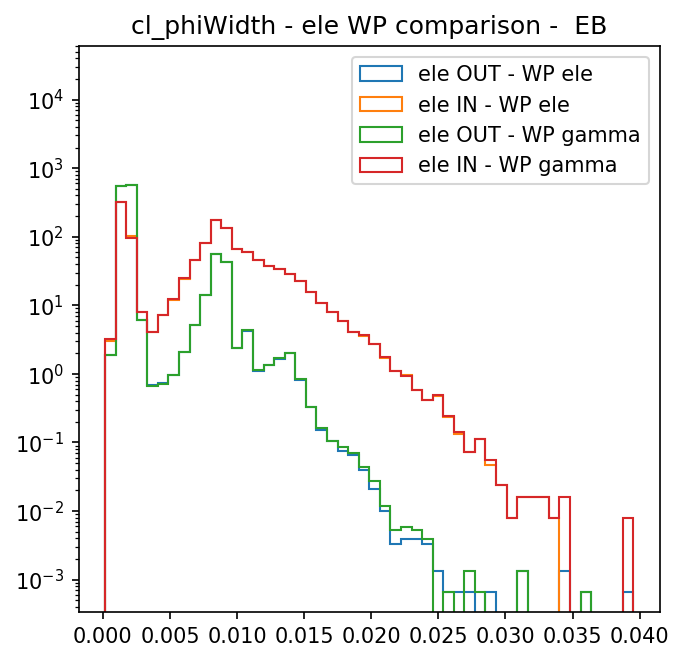

In [14]:
for col in cols:
    f = plt.figure()
    a = plt.hist(ele_wpele[(ele_wpele.seed_iz==0) & (ele_wpele.in_scluster==False) ][col], histtype="step",
                 density=True, bins=50,label="ele OUT - WP ele")

    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="ele OUT - WP gamma",range=(a[1][0], a[1][-1]))

    plt.hist(ele_wpele[(ele_wpele.seed_iz==0) & (ele_wpele.in_scluster) ][col], histtype="step",
                 density=True, bins=50,label="ele IN - WP ele",range=(a[1][0], a[1][-1]))


    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster) ][col], histtype="step",
    #             density=True, bins=50,label="ele IN - WP gamma",range=(a[1][0], a[1][-1]))

    #plt.hist(gamma_wpele[(gamma_wpele.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="gamma OUT - WP ele",range=(a[1][0], a[1][-1]))
    plt.hist(ele_wpgamma[(ele_wpgamma.seed_iz==0) & (ele_wpgamma.in_scluster==False) ][col], histtype="step",
                 density=True, bins=50,label="ele OUT - WP gamma",range=(a[1][0], a[1][-1]))

    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="ele OUT - WP gamma",range=(a[1][0], a[1][-1]))

    plt.hist(ele_wpgamma[(ele_wpgamma.seed_iz==0) & (ele_wpgamma.in_scluster) ][col], histtype="step",
                 density=True, bins=50,label="ele IN - WP gamma",range=(a[1][0], a[1][-1]))
   
    bottom,top = plt.ylim()


    plt.yscale("log")

    plt.ylim(top=top*100)
    plt.title(col +" - ele WP comparison -  EB")
    plt.legend()
    plt.savefig(output_dir+"/input_vars_inout_EB__onlyElectrons_{}.png".format(col))

    plt.show()
    plt.close(f)

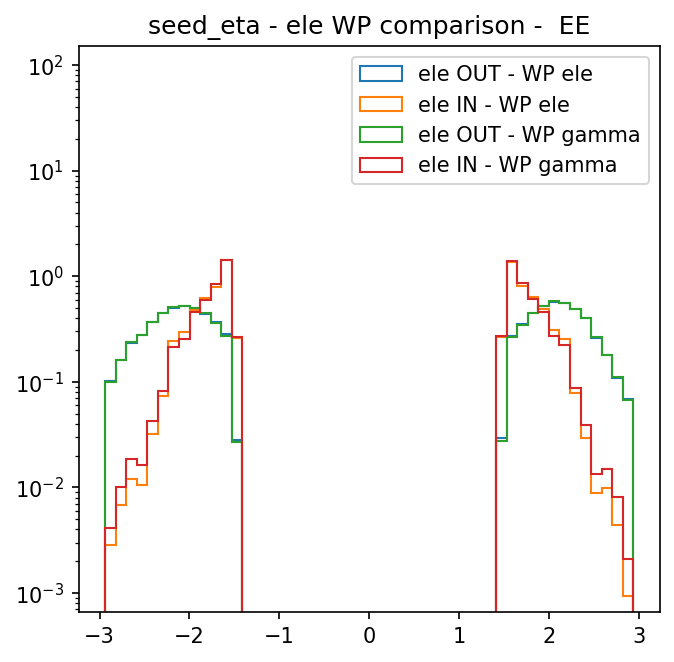

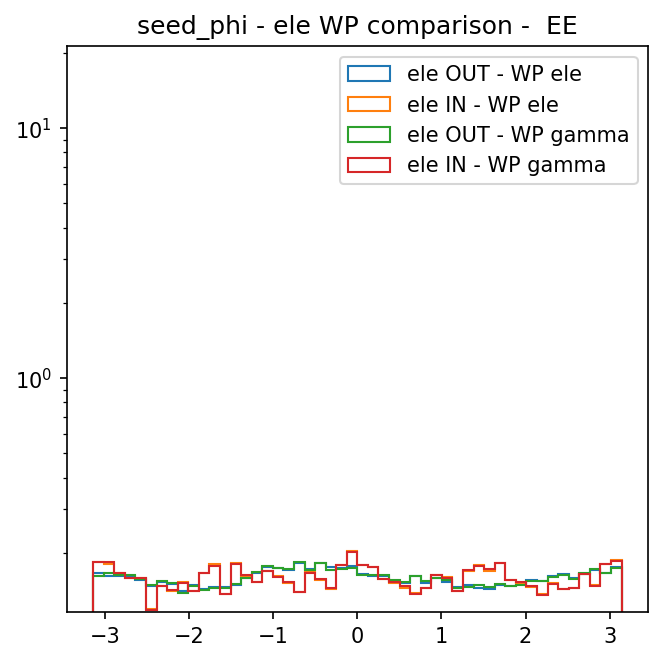

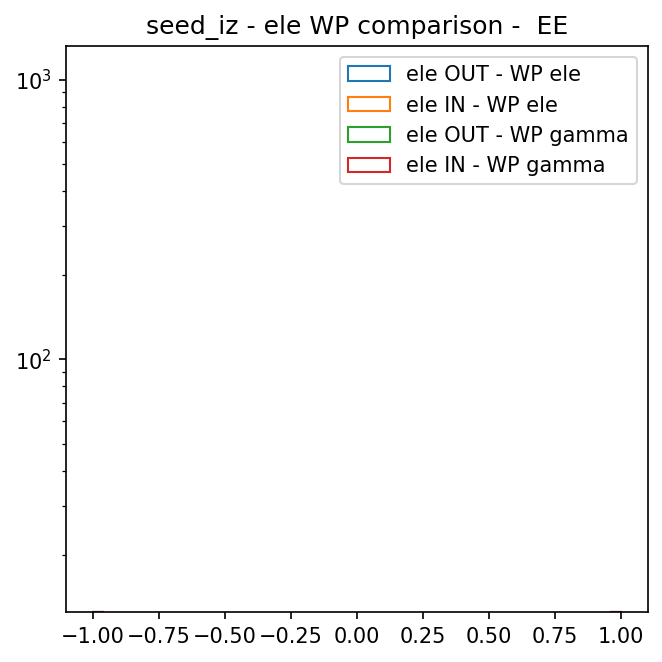

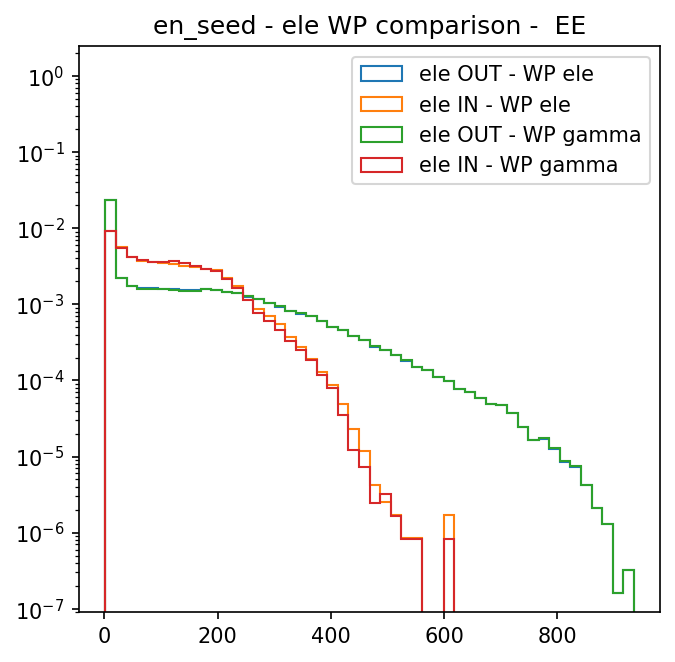

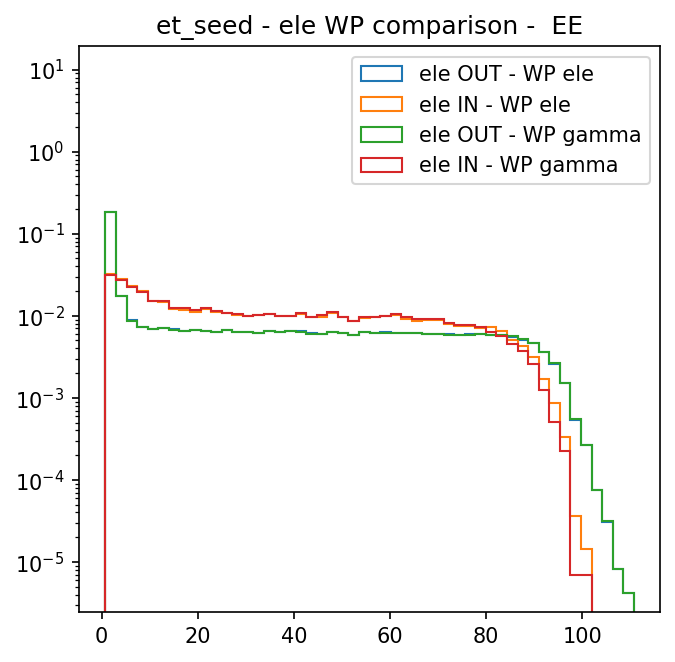

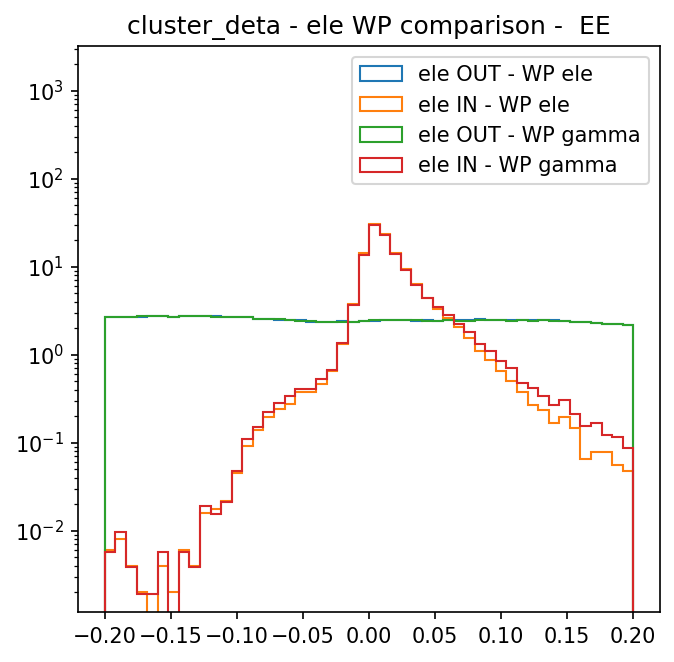

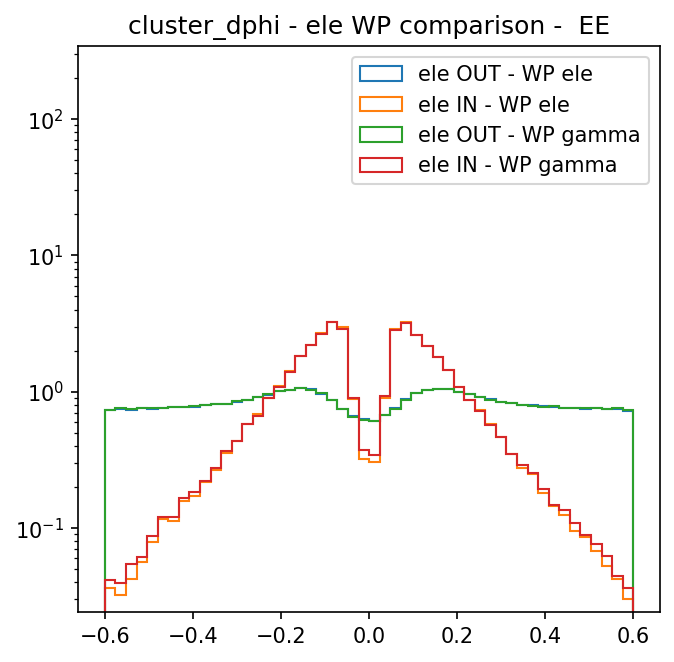

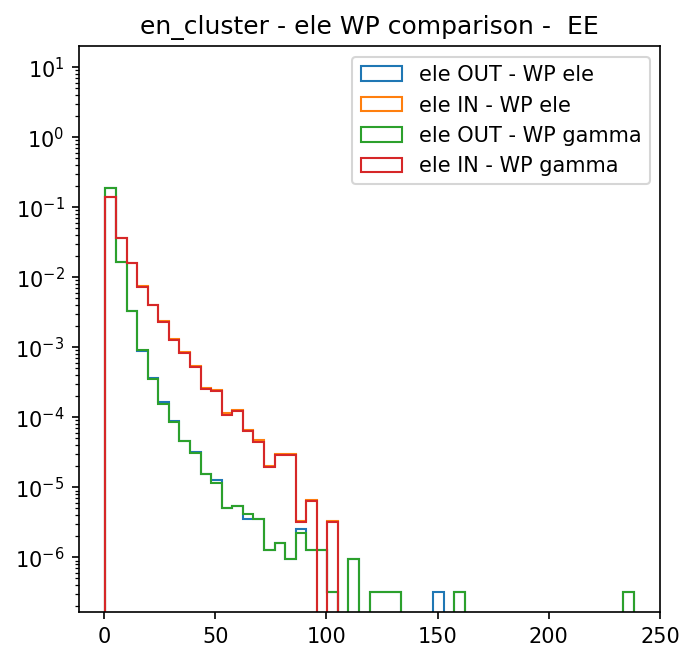

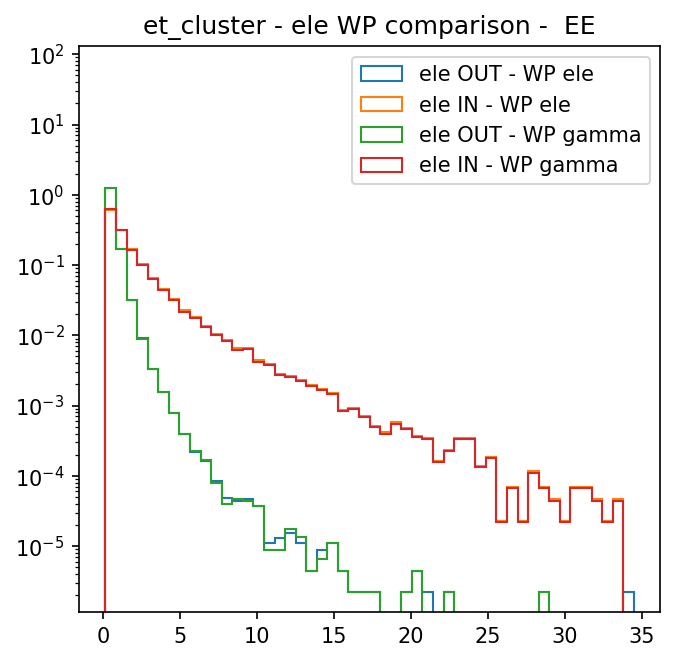

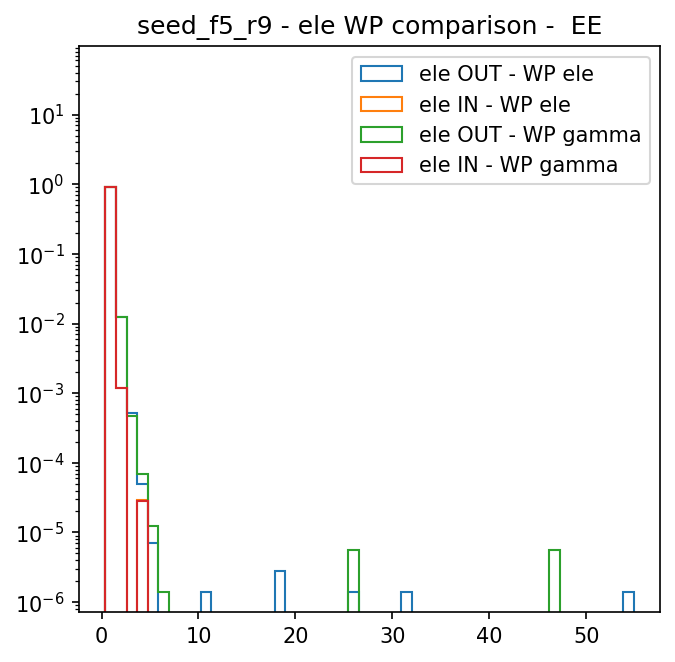

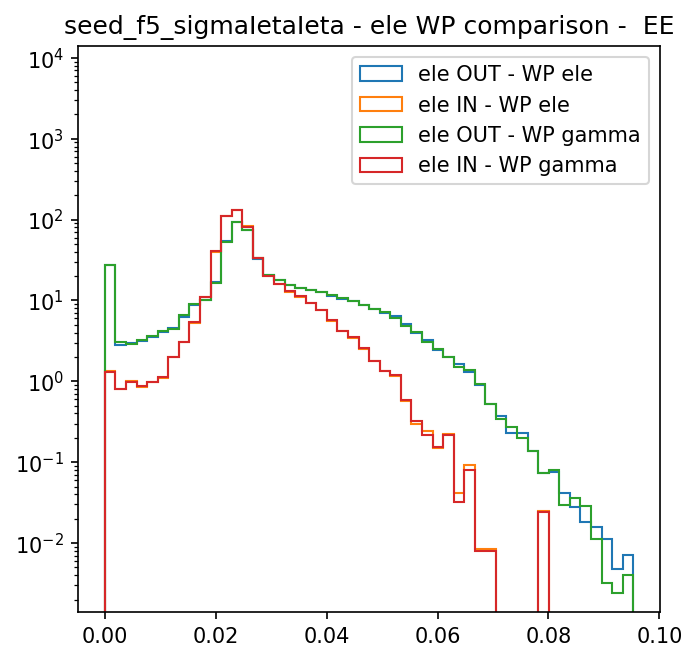

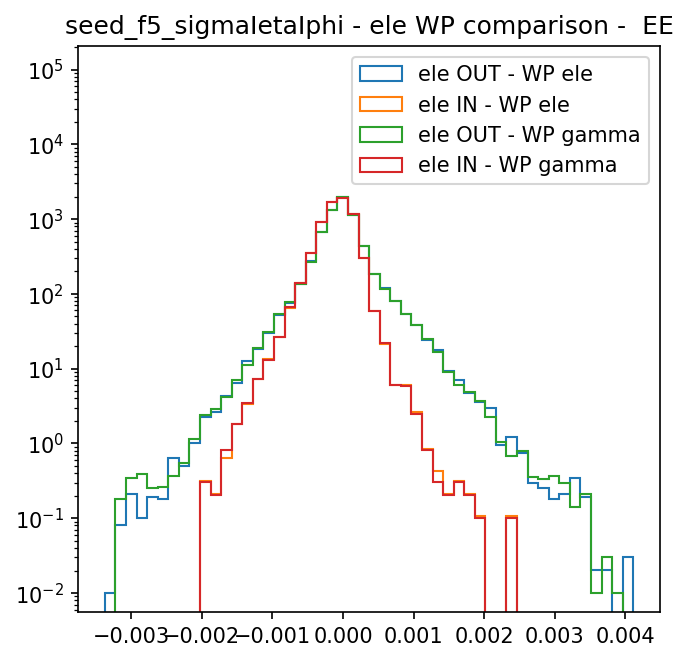

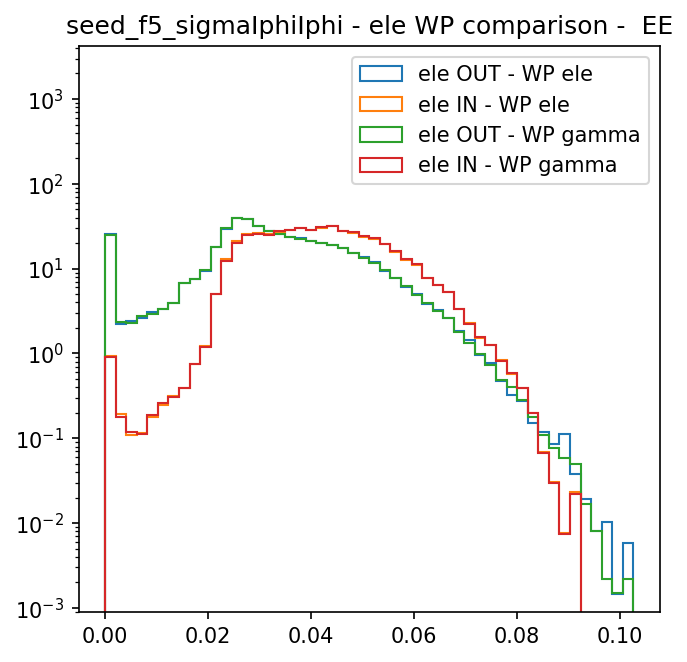

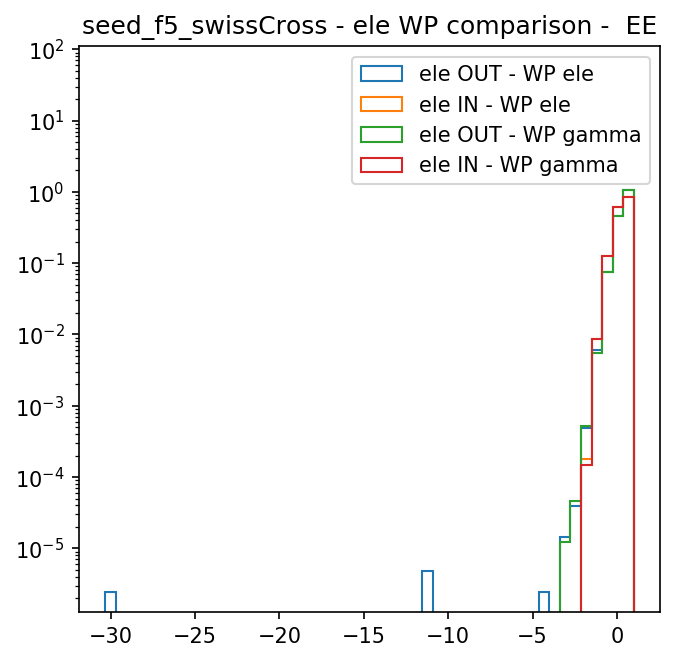

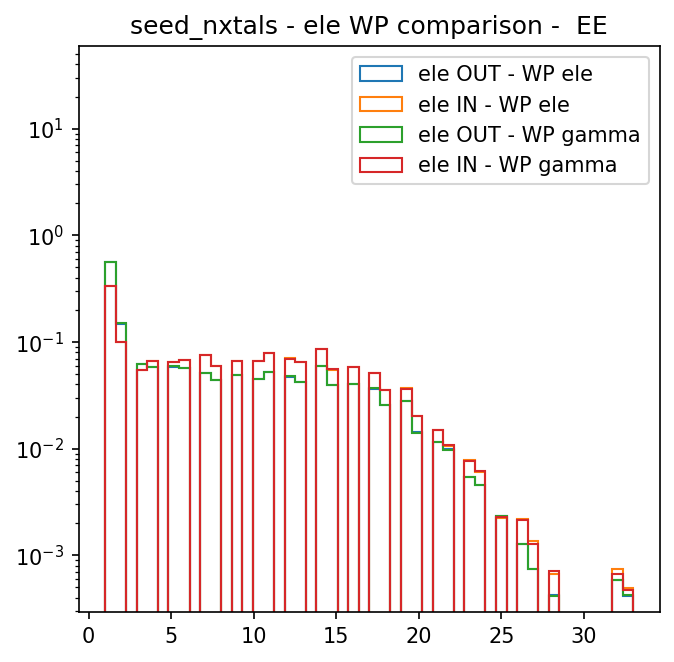

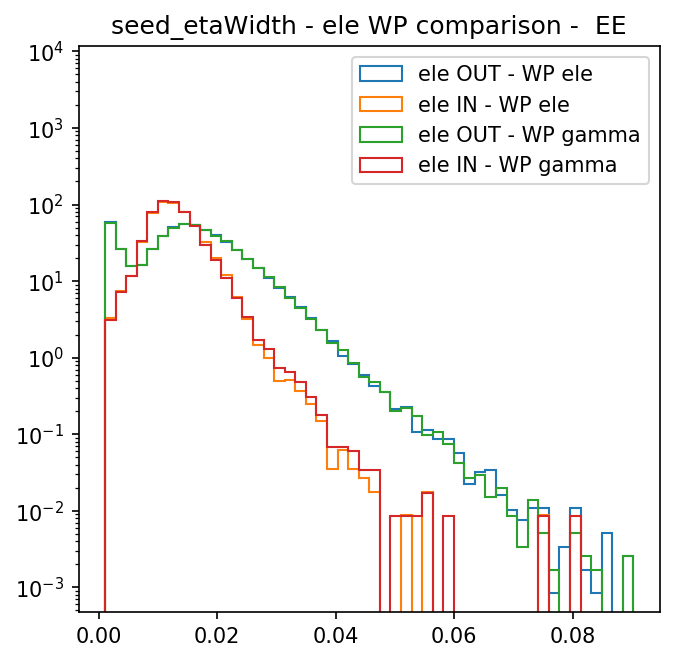

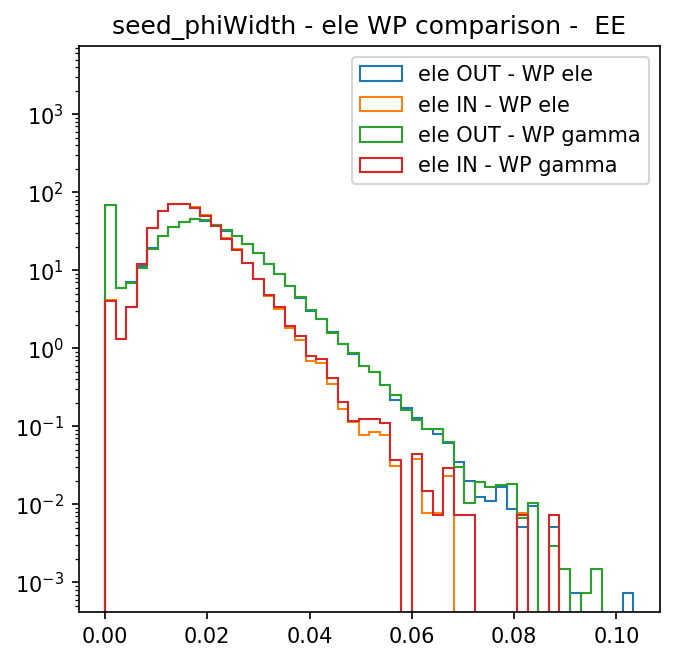

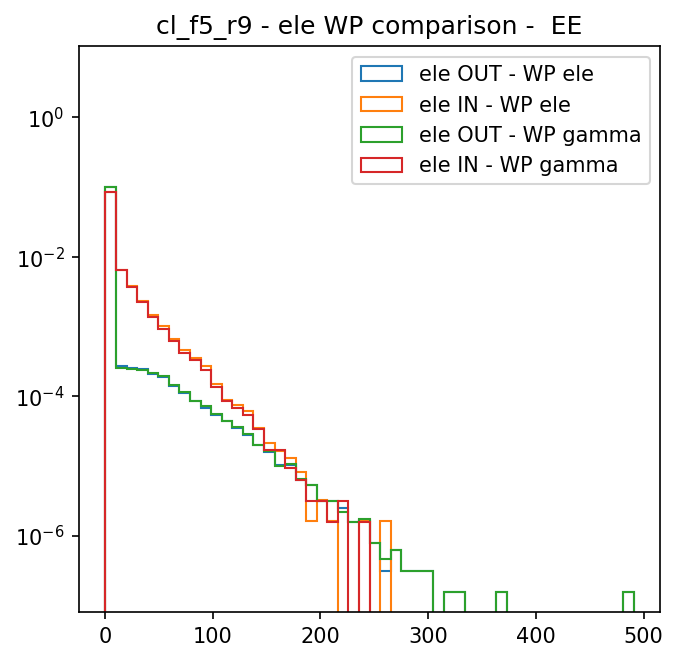

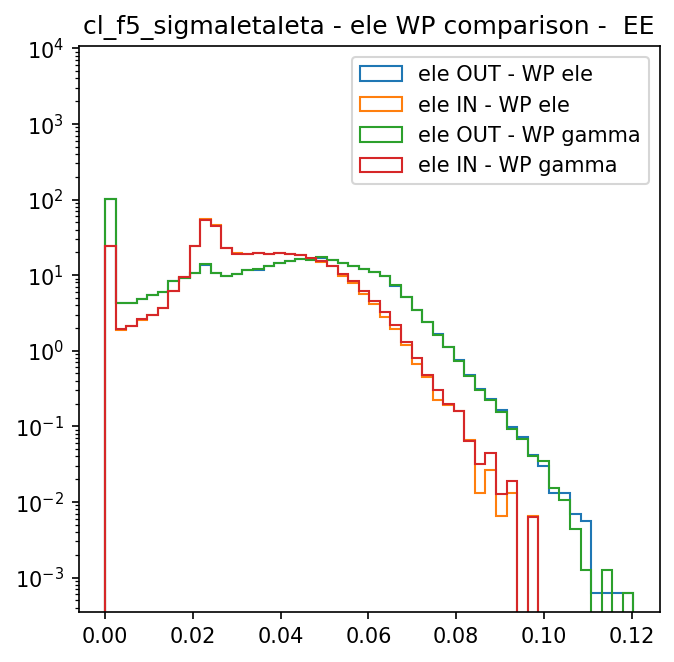

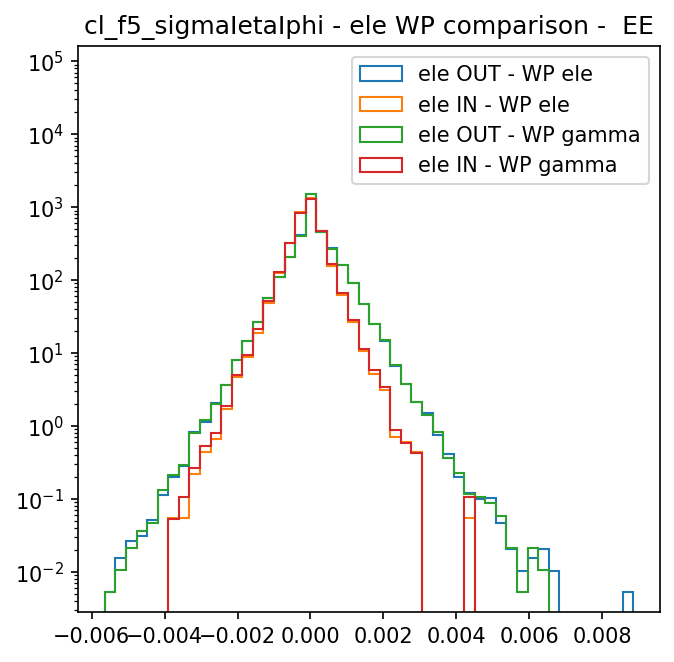

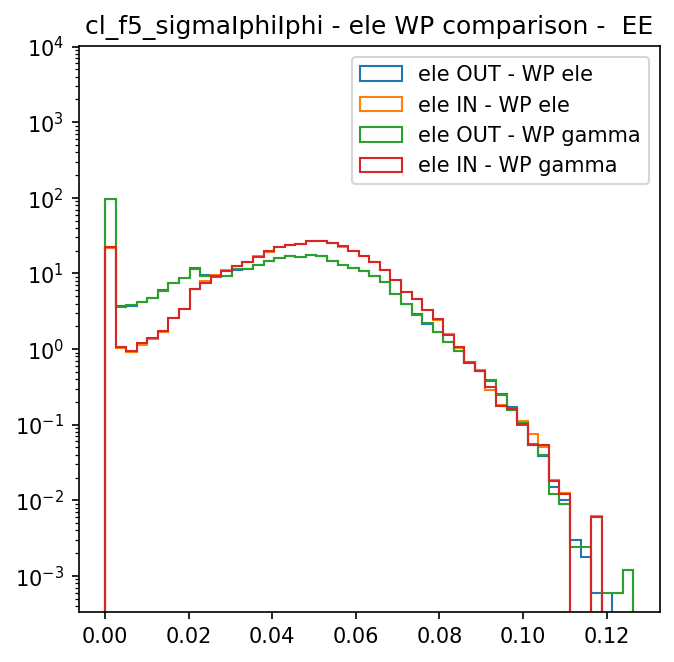

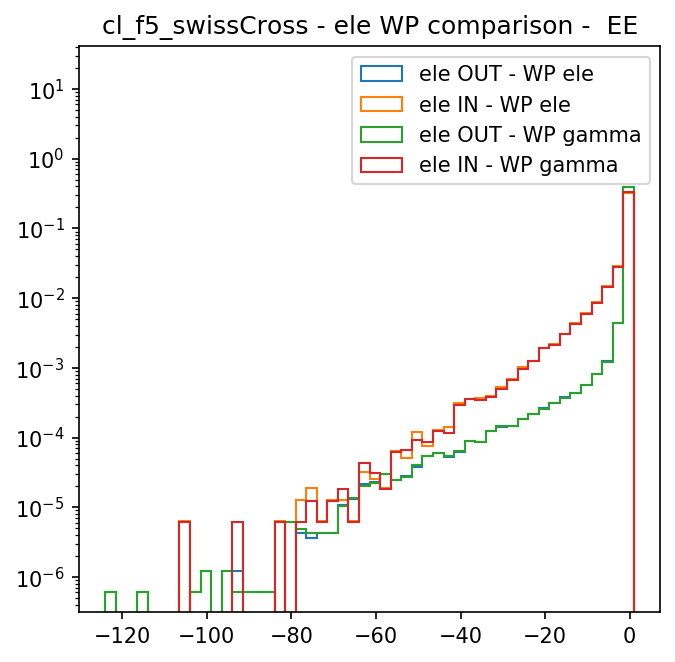

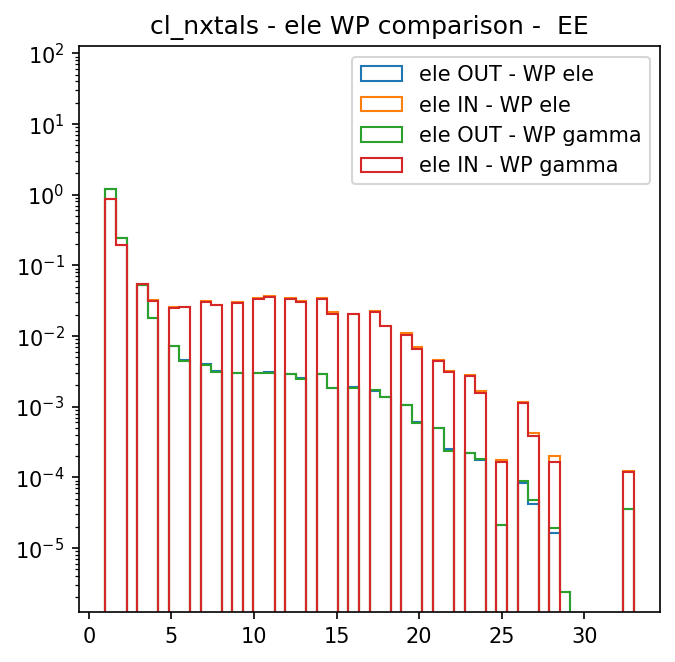

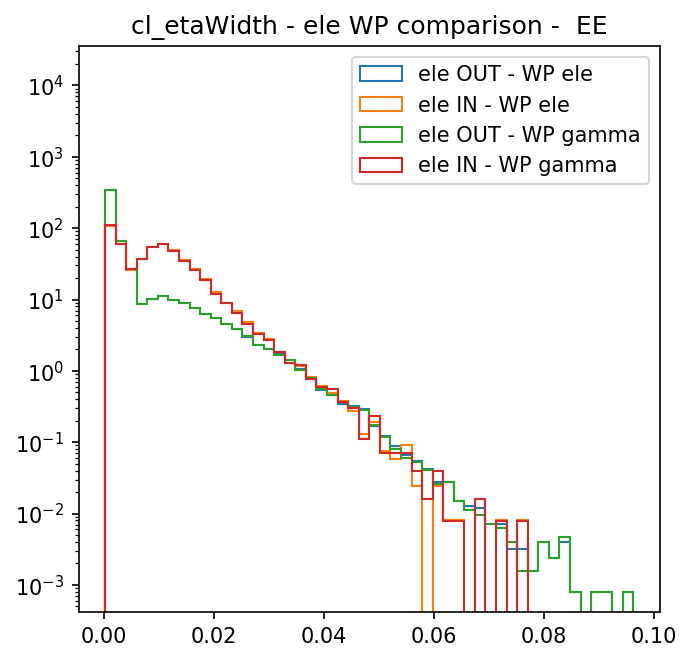

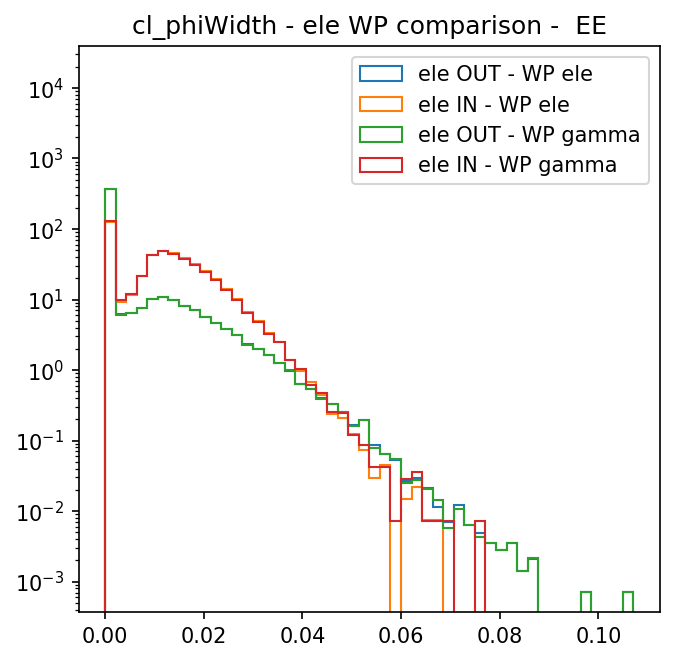

In [15]:
for col in cols:
    f = plt.figure()
    a = plt.hist(ele_wpele[(ele_wpele.seed_iz!=0) & (ele_wpele.in_scluster==False) ][col], histtype="step",
                 density=True, bins=50,label="ele OUT - WP ele")

    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="ele OUT - WP gamma",range=(a[1][0], a[1][-1]))

    plt.hist(ele_wpele[(ele_wpele.seed_iz!=0) & (ele_wpele.in_scluster) ][col], histtype="step",
                 density=True, bins=50,label="ele IN - WP ele",range=(a[1][0], a[1][-1]))


    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster) ][col], histtype="step",
    #             density=True, bins=50,label="ele IN - WP gamma",range=(a[1][0], a[1][-1]))

    #plt.hist(gamma_wpele[(gamma_wpele.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="gamma OUT - WP ele",range=(a[1][0], a[1][-1]))
    plt.hist(ele_wpgamma[(ele_wpgamma.seed_iz!=0) & (ele_wpgamma.in_scluster==False) ][col], histtype="step",
                 density=True, bins=50,label="ele OUT - WP gamma",range=(a[1][0], a[1][-1]))

    #plt.hist(ele_wpgamma[(ele_wpgamma.in_scluster==False) ][col], histtype="step",
    #             density=True, bins=50,label="ele OUT - WP gamma",range=(a[1][0], a[1][-1]))

    plt.hist(ele_wpgamma[(ele_wpgamma.seed_iz!=0) & (ele_wpgamma.in_scluster) ][col], histtype="step",
                 density=True, bins=50,label="ele IN - WP gamma",range=(a[1][0], a[1][-1]))
   
    bottom,top = plt.ylim()


    plt.yscale("log")

    plt.ylim(top=top*100)
    plt.title(col +" - ele WP comparison -  EE")
    plt.legend()
    plt.savefig(output_dir+"/input_vars_inout_EE__onlyElectrons_{}.png".format(col))

    plt.show()
    plt.close(f)